In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
def fiyat_format(x, pos):
    return f"{int(x):,} ₺".replace(",", ".")

In [3]:
df = pd.read_csv("temizlenmis_otomobil_verisi.csv")

In [4]:
df.head()

marka seri               model   yil  kilometre vites_tipi  \
0     Lexus   ES  300h Business Plus  2023      43000   Otomatik   
1     Lexus   LS      500h Exclusive  2021      23665   Otomatik   
2     Lexus   GS        200t F Sport  2016      90500   Otomatik   
3  Infiniti  I30                 3.0  1996     230000   Otomatik   
4  Infiniti  I30                 3.0  1996     298000   Otomatik   

     yakit_tipi kasa_tipi   renk  motor_hacmi  motor_gucu  degisen_sayisi  \
0        Benzin     Sedan  Siyah         2250         213               1   
1        Benzin     Sedan  Siyah         3250         363               0   
2        Benzin     Sedan  Beyaz         1900         238               0   
3  LPG & Benzin     Sedan  Yeşil         2988         190               0   
4  LPG & Benzin     Sedan  Yeşil         2988         190               0   

   boyali_sayisi      kimden    fiyat  
0              1   Galeriden  4950000  
1              0   Galeriden  9000000  
2              0   Galeriden  2745000  
3              7  Sahibinden   225000  
4              7  Sahibinden   475000

In [5]:
df.shape

(48969, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48969 entries, 0 to 48968
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   marka           48969 non-null  object
 1   seri            48969 non-null  object
 2   model           48969 non-null  object
 3   yil             48969 non-null  int64 
 4   kilometre       48969 non-null  int64 
 5   vites_tipi      48969 non-null  object
 6   yakit_tipi      48969 non-null  object
 7   kasa_tipi       48969 non-null  object
 8   renk            48969 non-null  object
 9   motor_hacmi     48969 non-null  int64 
 10  motor_gucu      48969 non-null  int64 
 11  degisen_sayisi  48969 non-null  int64 
 12  boyali_sayisi   48969 non-null  int64 
 13  kimden          48969 non-null  object
 14  fiyat           48969 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [7]:
df.describe().T

count           mean            std      min       25%  \
yil             48969.0    2010.379975       8.372904   1971.0    2005.0   
kilometre       48969.0  188856.077049   94398.847165      0.0  118000.0   
motor_hacmi     48969.0    1516.417897     287.749033    658.0    1372.0   
motor_gucu      48969.0     111.185362      37.522909     39.0      88.0   
degisen_sayisi  48969.0       0.482652       0.885445      0.0       0.0   
boyali_sayisi   48969.0       2.135494       2.967572      0.0       0.0   
fiyat           48969.0  802685.758643  759047.655552  10000.0  365000.0   

                     50%       75%         max  
yil               2012.0    2016.0      2025.0  
kilometre       189000.0  254000.0    463000.0  
motor_hacmi       1500.0    1596.0      6001.0  
motor_gucu         105.0     124.0       388.0  
degisen_sayisi       0.0       1.0        10.0  
boyali_sayisi        1.0       3.0        12.0  
fiyat           605000.0  999000.0  14950000.0

In [8]:
# Otomobil markaları
df["marka"].unique()

array(['Lexus', 'Infiniti', 'Ikco', 'Buick', 'Isuzu', 'Lada', 'Daewoo',
       'BMW', 'Ferrari', 'Geely', 'Chery', 'Chrysler', 'Alfa Romeo',
       'Cadillac', 'Aston Martin', 'Lincoln', 'Lotus', 'Kia', 'Ford',
       'Dodge', 'Hyundai', 'Fiat', 'Lancia', 'Honda', 'Jaguar',
       'Daihatsu', 'Chevrolet', 'Cupra', 'Maserati', 'Dacia', 'Audi',
       'Citroen', 'DS Automobiles', 'Mazda', 'Mercedes - Benz', 'MINI',
       'Mitsubishi', 'Pontiac', 'Nissan', 'Opel', 'Peugeot', 'Porsche',
       'Proton', 'Saab', 'Rover', 'Seat', 'Smart', 'Skoda', 'Subaru',
       'Suzuki', 'Tata', 'Renault', 'Tofaş', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [9]:
# Kaç farklı otomobil markası var
df["marka"].nunique()

56

In [10]:
# ortalama araba fiyatı
df["fiyat"].mean()

802685.7586432232

In [11]:
# Veri setindeki en pahalı araba
df[df["fiyat"] == df["fiyat"].max()]

marka seri        model   yil  kilometre vites_tipi  \
32631  Mercedes - Benz    S  S 500 500 L  2021     115000   Otomatik   

      yakit_tipi kasa_tipi   renk  motor_hacmi  motor_gucu  degisen_sayisi  \
32631     Benzin     Sedan  Siyah         2750         313               0   

       boyali_sayisi     kimden     fiyat  
32631              0  Galeriden  14950000

In [12]:
# Hangi marka otomobilden kaç adet var
df["marka"].value_counts()

marka
Honda              2472
Seat               2467
Toyota             2466
Volkswagen         2464
Peugeot            2456
Ford               2451
Hyundai            2449
Fiat               2445
Citroen            2434
Opel               2433
Audi               2414
Skoda              2412
Renault            2391
BMW                2387
Tofaş              2347
Mercedes - Benz    2322
Chevrolet          1882
Dacia              1603
Kia                1317
Nissan              998
Volvo               931
Lada                530
Mazda               523
Mitsubishi          362
Suzuki              316
Alfa Romeo          305
MINI                225
Tata                135
Geely               119
Jaguar               97
Rover                88
Proton               87
DS Automobiles       81
Porsche              77
Subaru               68
Daewoo               68
Chrysler             61
Chery                53
Lancia               52
Daihatsu             51
Cupra                40
Maserati  

In [13]:
# Güçlü otomobiller HP > 300
df[df["motor_gucu"] > 300]

marka     seri            model   yil  kilometre vites_tipi  \
1                Lexus       LS   500h Exclusive  2021      23665   Otomatik   
10            Infiniti        G           G37 GT  2011     157940   Otomatik   
14               Lexus       LS   500h Exclusive  2022      75000   Otomatik   
15               Lexus       LS   500h Exclusive  2022      29000   Otomatik   
20            Infiniti        G            G37 S  2009     138000   Otomatik   
...                ...      ...              ...   ...        ...        ...   
46181  Mercedes - Benz        S        S 500 500  1996     380000   Otomatik   
47037  Mercedes - Benz      CLS            400 D  2018     164000   Otomatik   
47041  Mercedes - Benz        S  S 400 400 d AMG  2018     178000   Otomatik   
47049  Mercedes - Benz   AMG GT        43 4Matic  2020      67000   Otomatik   
47594             Ford  Mustang     2.3 Fastback  2016     142000   Otomatik   

      yakit_tipi kasa_tipi     renk  motor_hacmi  motor_gucu  degisen_sayisi  \
1         Benzin     Sedan    Siyah         3250         363               0   
10        Benzin    Cabrio    Yeşil         3750         313               0   
14        Benzin     Sedan    Siyah         3250         363               1   
15        Benzin     Sedan    Siyah         3250         363               0   
20        Benzin     Coupe    Siyah         3750         313               0   
...          ...       ...      ...          ...         ...             ...   
46181     Benzin     Sedan    Siyah         4750         313               0   
47037     Benzin     Coupe    Siyah         2750         338               2   
47041     Benzin     Sedan    Siyah         2925         340               0   
47049     Benzin     Coupe    Siyah         2750         363               0   
47594     Benzin     Coupe  Kırmızı         2250         313               0   

       boyali_sayisi     kimden     fiyat  
1                  0  Galeriden   9000000  
10                12  Galeriden   1499000  
14                 0  Galeriden   8450000  
15                 0  Galeriden   9950000  
20                 8  Galeriden   3950000  
...              ...        ...       ...  
46181              0  Galeriden   2350000  
47037              1  Galeriden   4390000  
47041              3  Galeriden   6690000  
47049              0  Galeriden  10500000  
47594              0  Galeriden   3770000  

[152 rows x 15 columns]

In [14]:
top_marka = df["marka"].value_counts()[:15]
pie_veri = top_marka.copy()
diger = df["marka"].value_counts()[15:].sum()
pie_veri["Diğer"] = diger

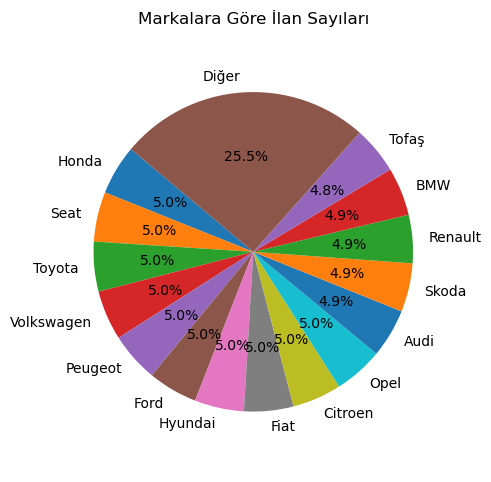

In [15]:
plt.figure(figsize=(5, 5))
plt.pie(pie_veri, labels=pie_veri.index, autopct='%1.1f%%', startangle=140)
plt.title("Markalara Göre İlan Sayıları")
plt.axis('equal')
plt.tight_layout()
plt.show()

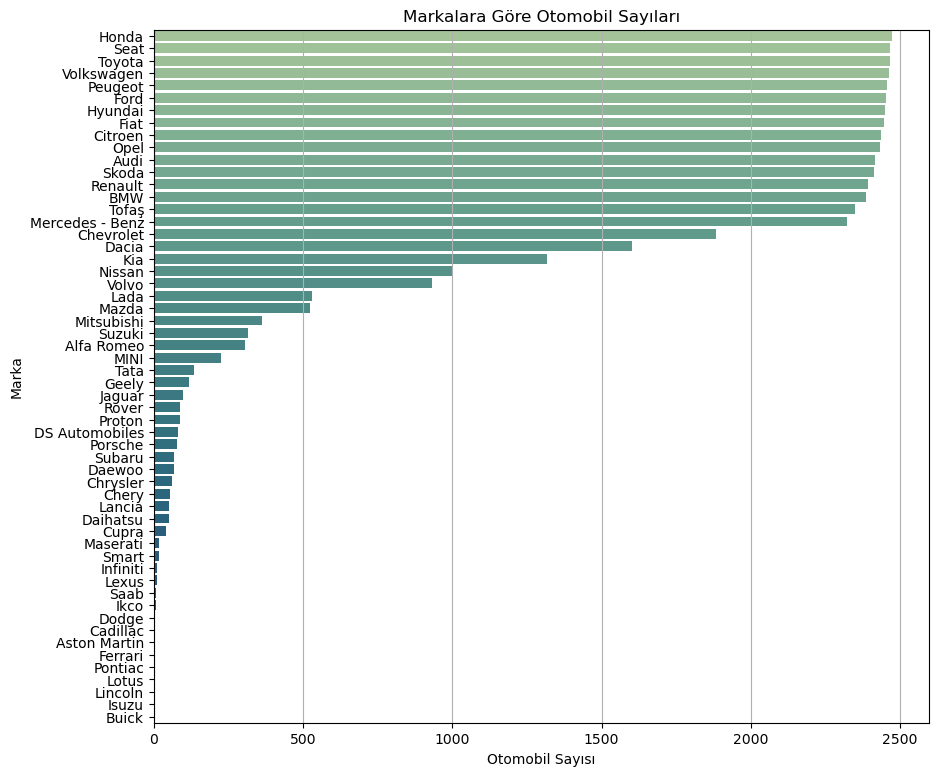

In [16]:
plt.figure(figsize=(10, 9))
sns.barplot(x=df["marka"].value_counts().values, y=df["marka"].value_counts().index, palette="crest")
plt.title("Markalara Göre Otomobil Sayıları")
plt.ylabel("Marka")
plt.xlabel("Otomobil Sayısı")
plt.grid(True, axis="x")
plt.show()
#plt.savefig("markalara_gore_otomobil_sayılar.png")

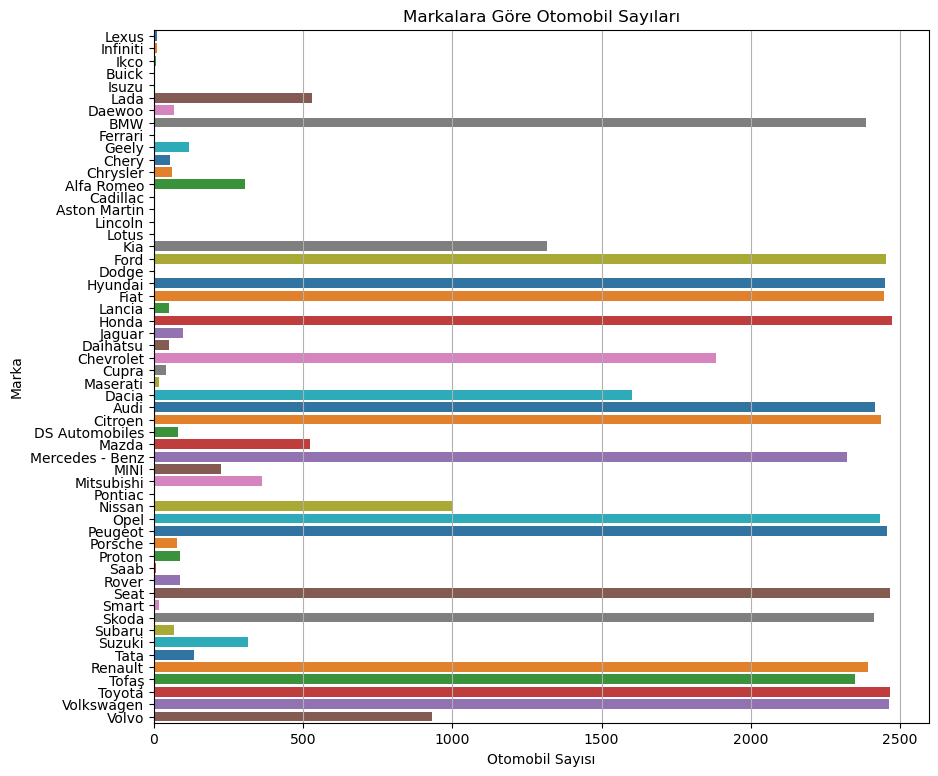

In [17]:
plt.figure(figsize=(10, 9))
sns.countplot(y=df["marka"], palette="tab10")
plt.title("Markalara Göre Otomobil Sayıları")
plt.ylabel("Marka")
plt.xlabel("Otomobil Sayısı")
plt.grid(True, axis="x")
#plt.savefig("markalara_gore_otomobil_sayilari.png")
plt.show()

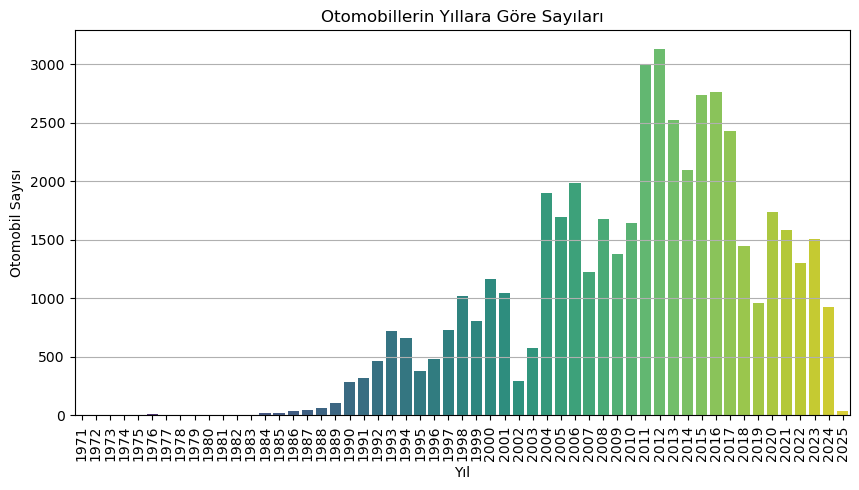

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["yil"], palette="viridis")
plt.title("Otomobillerin Yıllara Göre Sayıları")
plt.xlabel("Yıl")
plt.ylabel("Otomobil Sayısı")
plt.xticks(rotation=90)
plt.grid(True, axis="y")
#plt.savefig("otomobilin_yillara_gore_sayilari.png")
plt.show()

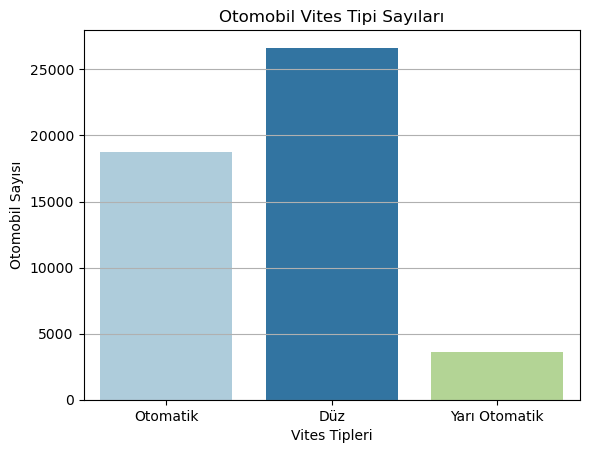

In [19]:
plt.figure()
sns.countplot(x=df["vites_tipi"], palette="Paired")
plt.title("Otomobil Vites Tipi Sayıları")
plt.xlabel("Vites Tipleri")
plt.ylabel("Otomobil Sayısı")
plt.grid(True, axis="y")
plt.show()

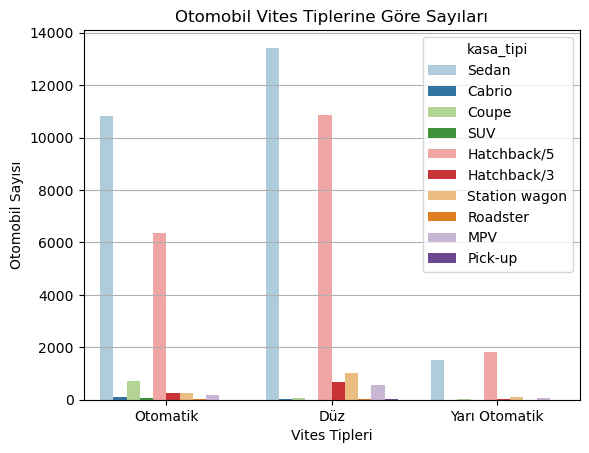

In [20]:
plt.figure()
sns.countplot(x=df["vites_tipi"], hue=df["kasa_tipi"], palette="Paired")
plt.title("Otomobil Vites Tiplerine Göre Sayıları")
plt.xlabel("Vites Tipleri")
plt.ylabel("Otomobil Sayısı")
plt.grid(True, axis="y")
plt.show()

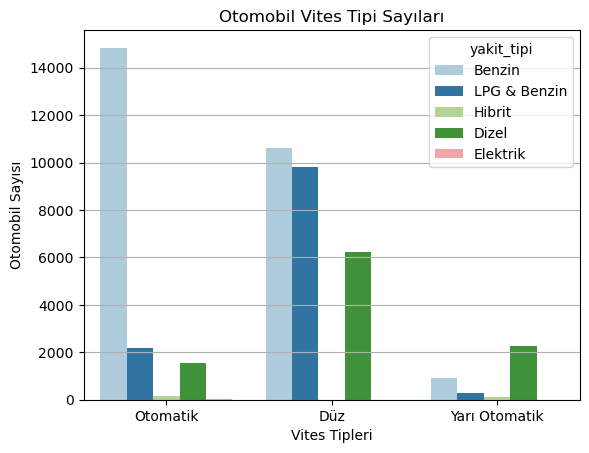

In [21]:
plt.figure()
sns.countplot(x=df["vites_tipi"], hue=df["yakit_tipi"], palette="Paired")
plt.title("Otomobil Vites Tipi Sayıları")
plt.xlabel("Vites Tipleri")
plt.ylabel("Otomobil Sayısı")
plt.grid(True, axis="y")
plt.show()

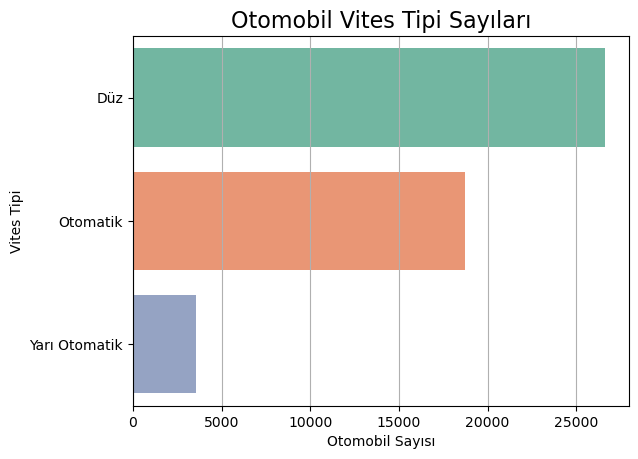

In [22]:
plt.figure()
sns.countplot(y="vites_tipi", data=df, order=df["vites_tipi"].value_counts().index, palette="Set2")
plt.title("Otomobil Vites Tipi Sayıları", fontsize=16)
plt.xlabel("Otomobil Sayısı")
plt.ylabel("Vites Tipi")
plt.grid(True, axis="x")
plt.show()

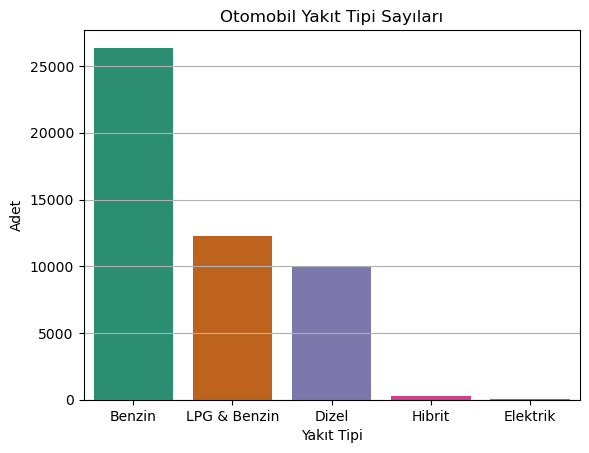

In [23]:
plt.figure()
sns.barplot(x=df["yakit_tipi"].value_counts().index, y=df["yakit_tipi"].value_counts().values, palette="Dark2")
plt.title("Otomobil Yakıt Tipi Sayıları")
plt.xlabel("Yakıt Tipi")
plt.ylabel("Adet")
plt.grid(True, axis="y")
plt.show()

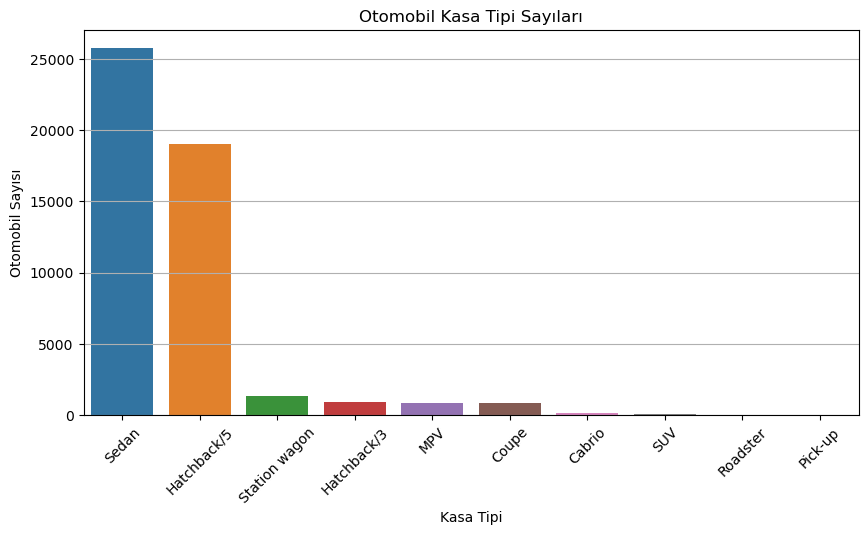

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df["kasa_tipi"].value_counts().index, y=df["kasa_tipi"].value_counts().values,palette="tab10")
plt.title("Otomobil Kasa Tipi Sayıları")
plt.xlabel("Kasa Tipi")
plt.ylabel("Otomobil Sayısı")
plt.grid(True, axis="y")
plt.xticks(rotation=45)
plt.show()

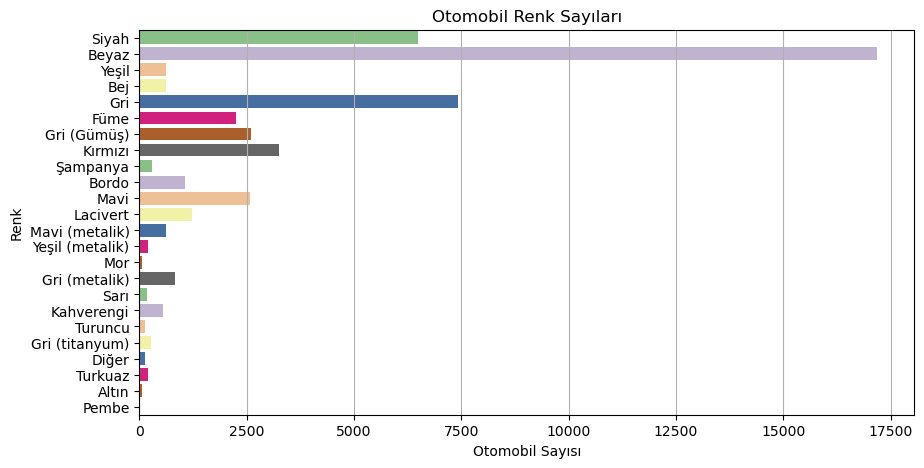

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["renk"], palette="Accent")
plt.title("Otomobil Renk Sayıları")
plt.xlabel("Otomobil Sayısı")
plt.ylabel("Renk")
plt.grid(True, axis="x")
plt.show()

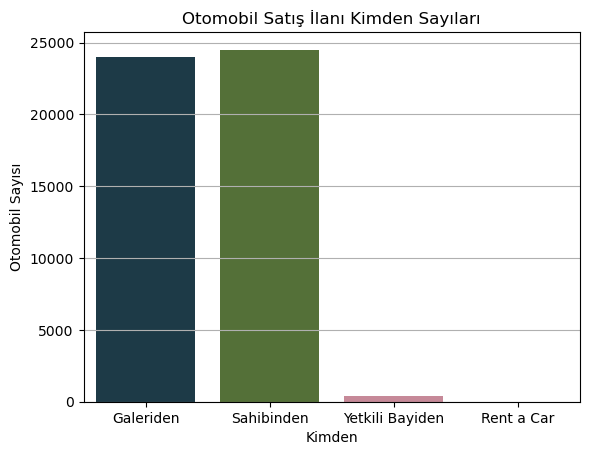

In [26]:
plt.figure()
sns.countplot(x=df["kimden"], palette="cubehelix")
plt.title("Otomobil Satış İlanı Kimden Sayıları")
plt.xlabel("Kimden")
plt.ylabel("Otomobil Sayısı")
plt.grid(True, axis="y")
plt.show()

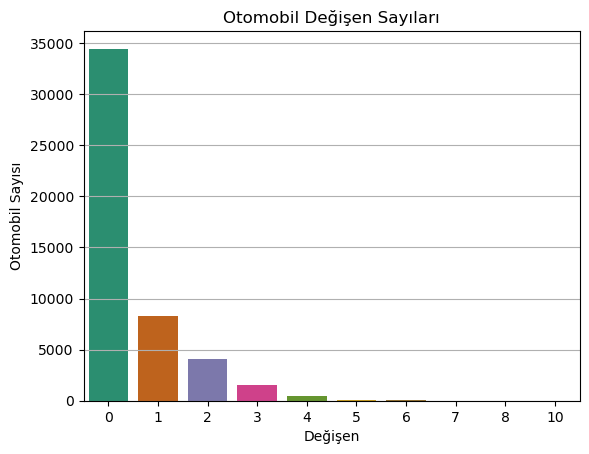

In [27]:
plt.figure()
sns.countplot(x=df["degisen_sayisi"], palette="Dark2")
plt.title("Otomobil Değişen Sayıları")
plt.xlabel("Değişen")
plt.ylabel("Otomobil Sayısı")
plt.grid(True, axis="y")
plt.show()

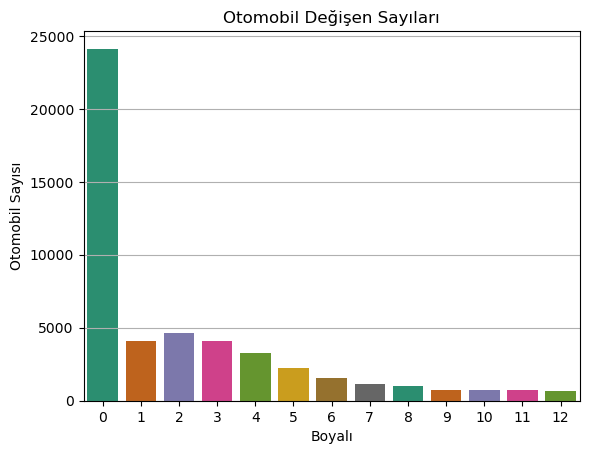

In [28]:
plt.figure()
sns.countplot(x=df["boyali_sayisi"], palette="Dark2")
plt.title("Otomobil Değişen Sayıları")
plt.xlabel("Boyalı")
plt.ylabel("Otomobil Sayısı")
plt.grid(True, axis="y")
plt.show()

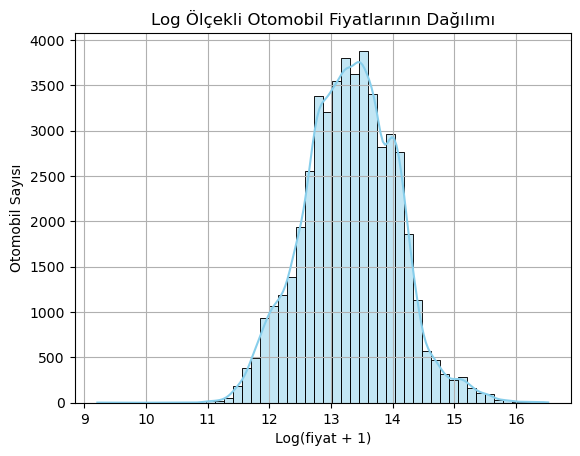

In [29]:
plt.figure()
sns.histplot(np.log1p(df["fiyat"]), kde=True, bins=50, color="skyblue")
plt.title("Log Ölçekli Otomobil Fiyatlarının Dağılımı")
plt.xlabel("Log(fiyat + 1)")
plt.ylabel("Otomobil Sayısı")
plt.grid(True)
plt.show()

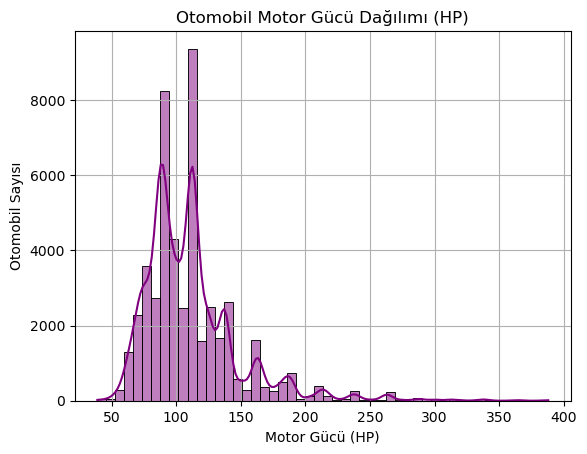

In [30]:
plt.figure()
sns.histplot(df["motor_gucu"], kde=True, bins=50, color="purple")
plt.title("Otomobil Motor Gücü Dağılımı (HP)")
plt.xlabel("Motor Gücü (HP)")
plt.ylabel("Otomobil Sayısı")
plt.grid(True)
plt.show()

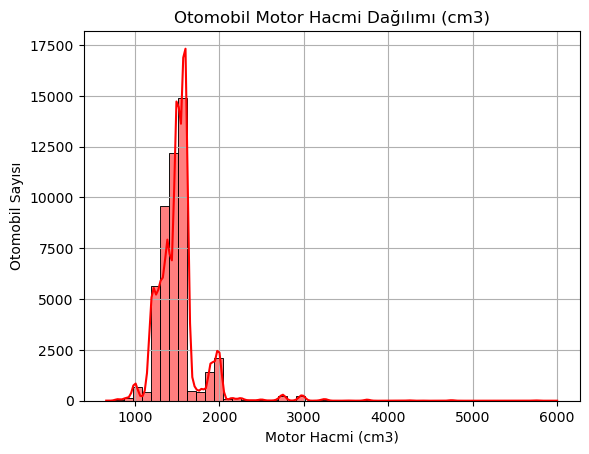

In [31]:
plt.figure()
sns.histplot(df["motor_hacmi"], kde=True, bins=50, color="red")
plt.title("Otomobil Motor Hacmi Dağılımı (cm3)")
plt.xlabel("Motor Hacmi (cm3)")
plt.ylabel("Otomobil Sayısı")
plt.grid(True)
plt.show()

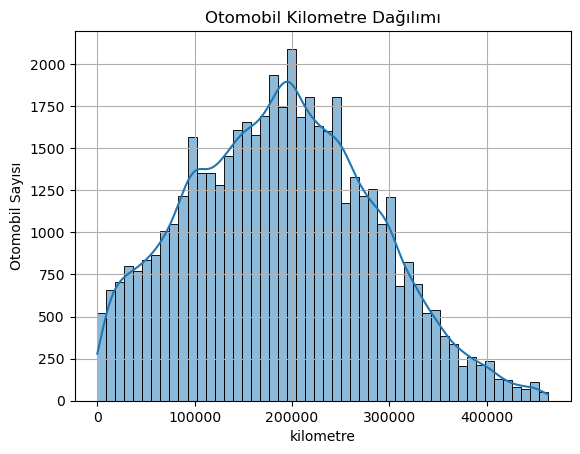

In [32]:
plt.figure()
sns.histplot(df["kilometre"], kde= True, bins=50, palette="viridis")
plt.title("Otomobil Kilometre Dağılımı")
plt.xlabel("kilometre")
plt.ylabel("Otomobil Sayısı")
plt.grid(True)
plt.show()

## 2 Değişkenli Veri Analizi

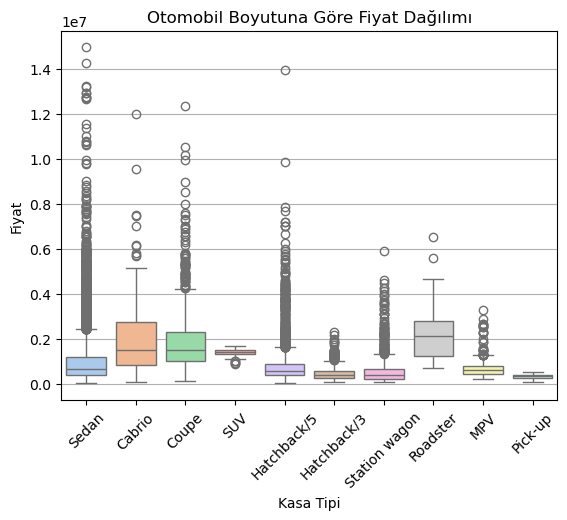

In [34]:
plt.figure()
sns.boxplot(x="kasa_tipi", y="fiyat", data=df, palette="pastel")
plt.title("Otomobil Boyutuna Göre Fiyat Dağılımı")
plt.xlabel("Kasa Tipi")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()

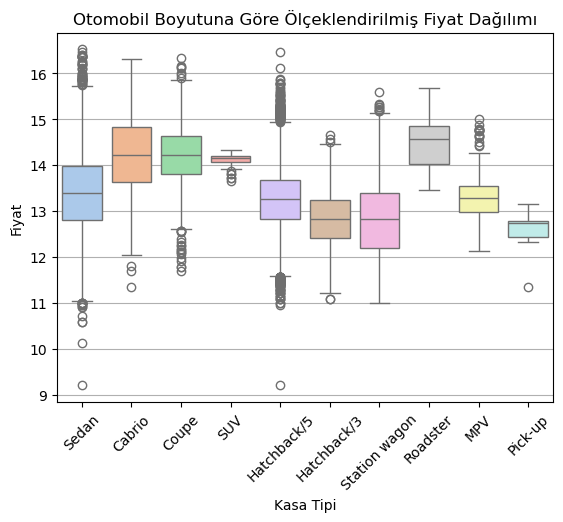

In [35]:
plt.figure()
sns.boxplot(x="kasa_tipi", y=np.log1p(df["fiyat"]), data=df, palette="pastel")
plt.title("Otomobil Boyutuna Göre Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Kasa Tipi")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()

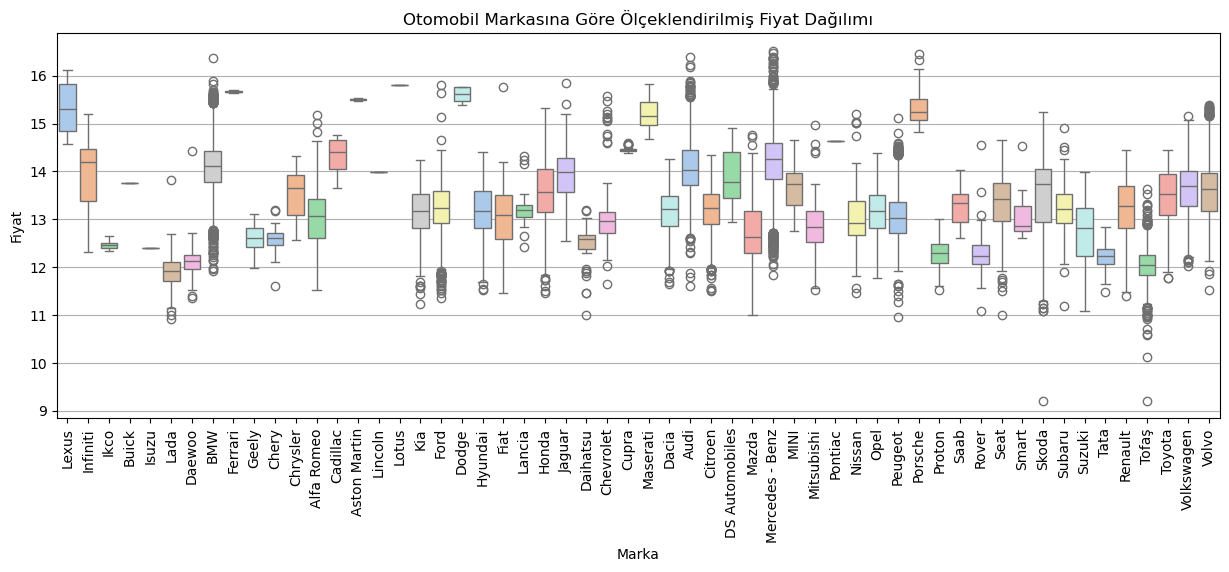

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(x="marka", y=np.log1p(df["fiyat"]), data=df, palette="pastel")
plt.title("Otomobil Markasına Göre Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Marka")
plt.ylabel("Fiyat")
plt.xticks(rotation=90)
plt.grid(True, axis="y")
plt.show()

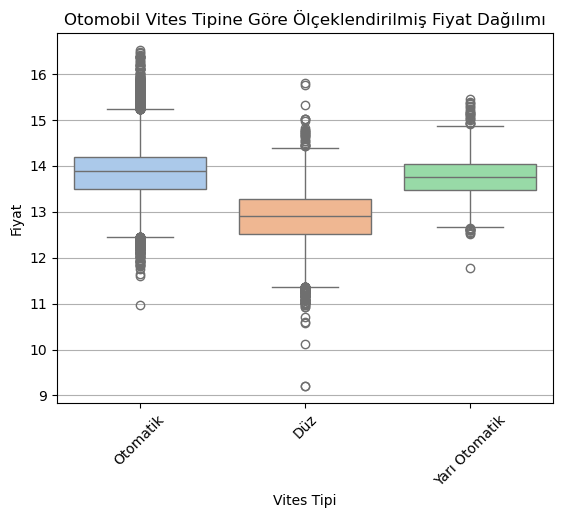

In [37]:
plt.figure()
sns.boxplot(x="vites_tipi", y=np.log1p(df["fiyat"]), data=df, palette="pastel")
plt.title("Otomobil Vites Tipine Göre Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Vites Tipi")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()

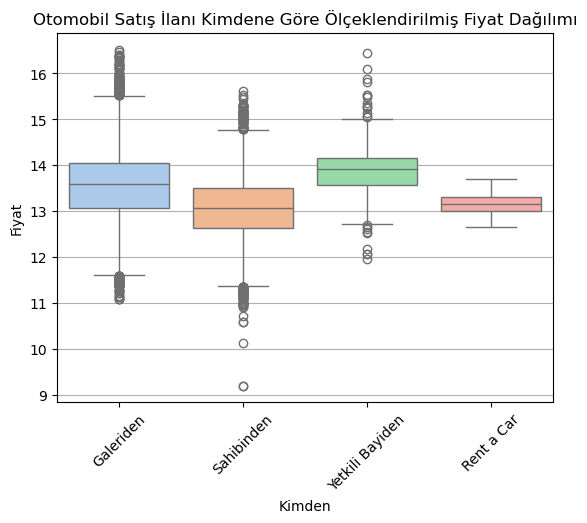

In [38]:
plt.figure()
sns.boxplot(x="kimden", y=np.log1p(df["fiyat"]), data=df, palette="pastel")
plt.title("Otomobil Satış İlanı Kimdene Göre Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Kimden")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()

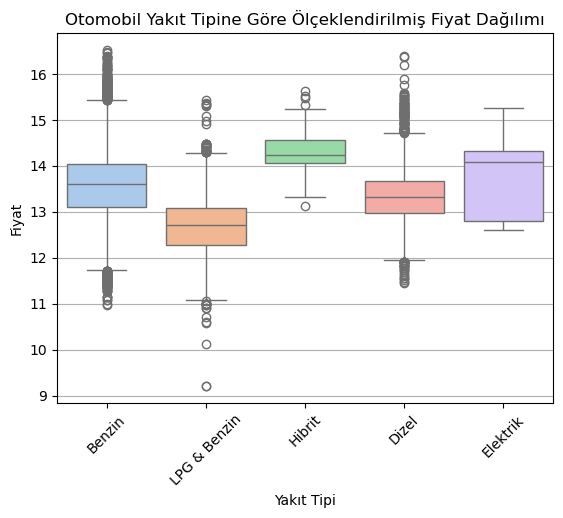

In [39]:
plt.figure()
sns.boxplot(x="yakit_tipi", y=np.log1p(df["fiyat"]), data=df, palette="pastel")
plt.title("Otomobil Yakıt Tipine Göre Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Yakıt Tipi")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()

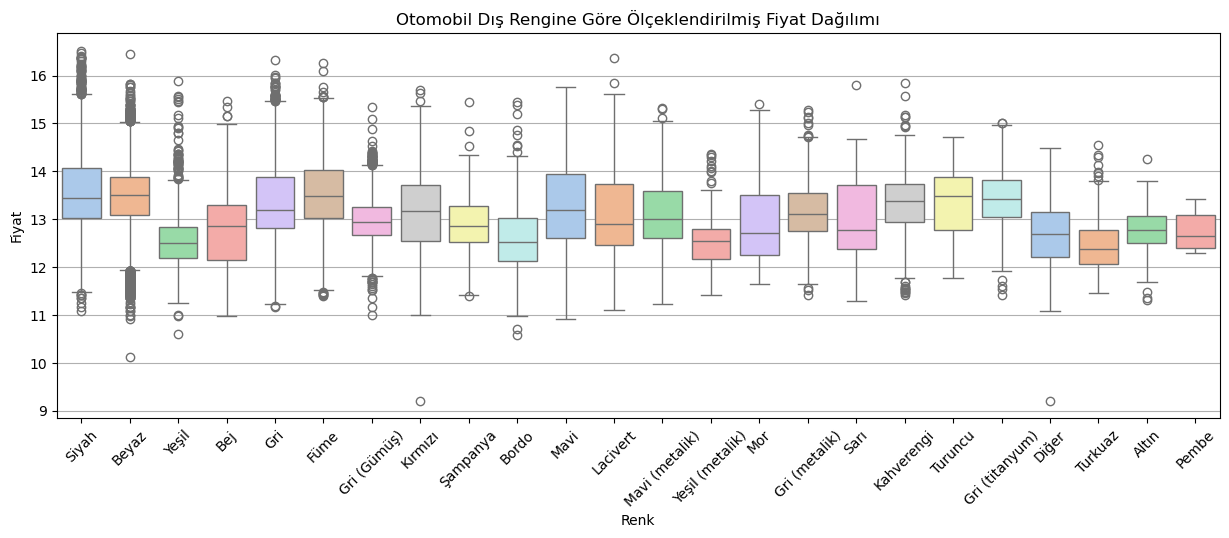

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x="renk", y=np.log1p(df["fiyat"]), data=df, palette="pastel")
plt.title("Otomobil Dış Rengine Göre Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Renk")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()

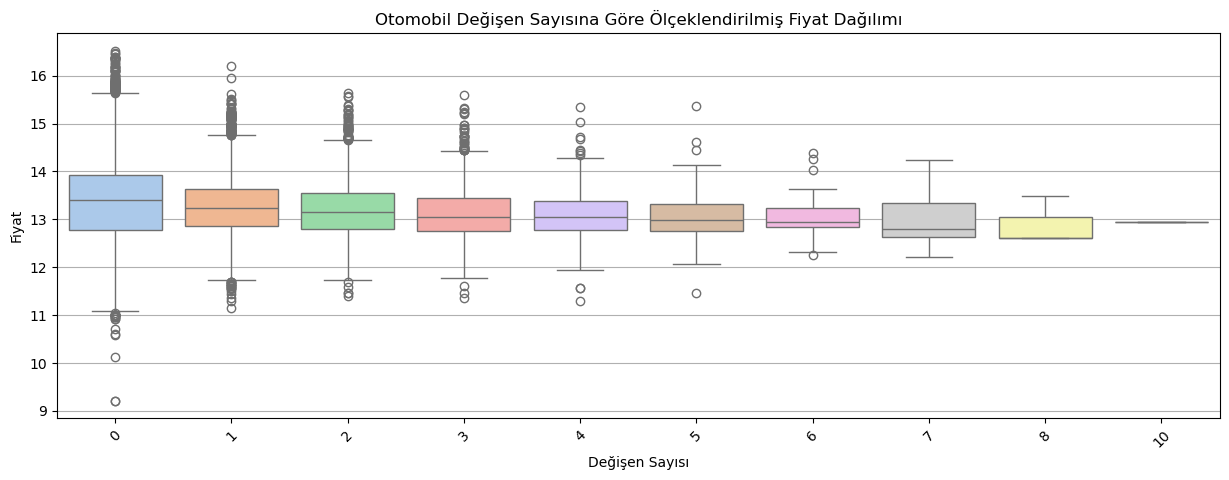

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(x="degisen_sayisi", y=np.log1p(df["fiyat"]), data=df, palette="pastel")
plt.title("Otomobil Değişen Sayısına Göre Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Değişen Sayısı")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()

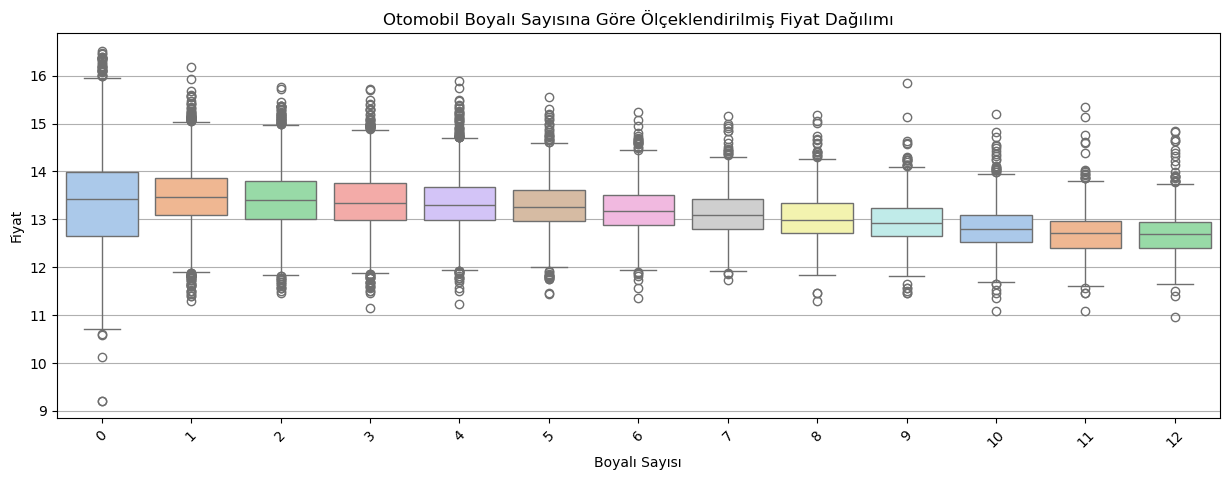

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(x="boyali_sayisi", y=np.log1p(df["fiyat"]), data=df, palette="pastel")
plt.title("Otomobil Boyalı Sayısına Göre Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Boyalı Sayısı")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()

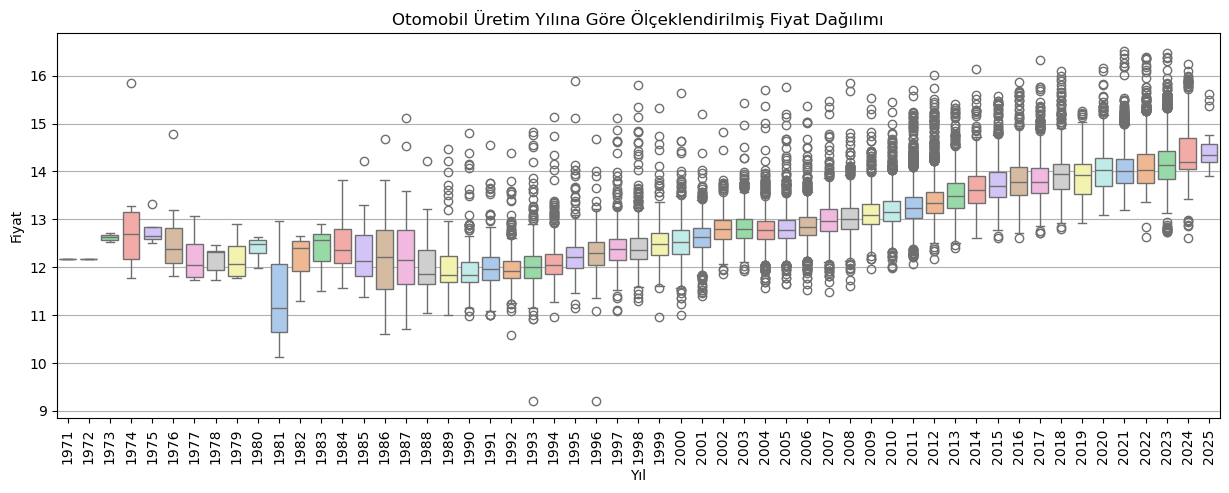

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(x="yil", y=np.log1p(df["fiyat"]), data=df, palette="pastel")
plt.title("Otomobil Üretim Yılına Göre Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Fiyat")
plt.xticks(rotation=90)
plt.grid(True, axis="y")
plt.show()

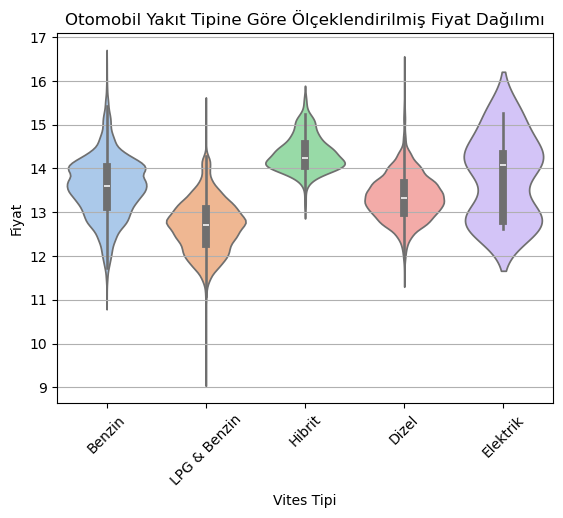

In [44]:
plt.figure()
sns.violinplot(x="yakit_tipi", y=np.log1p(df["fiyat"]), data=df, palette="pastel")
plt.title("Otomobil Yakıt Tipine Göre Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Vites Tipi")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()

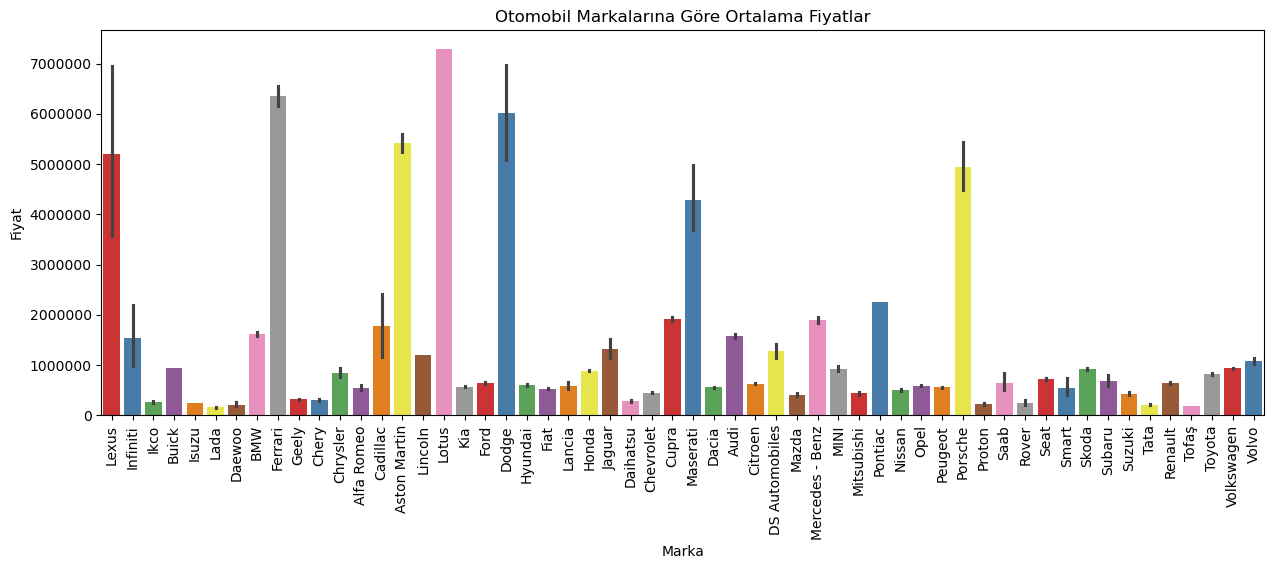

In [45]:
plt.figure(figsize=(15, 5))
sns.barplot(x="marka", y="fiyat", data=df, estimator=np.mean, palette="Set1")
plt.title("Otomobil Markalarına Göre Ortalama Fiyatlar")
plt.xlabel("Marka")
plt.ylabel("Fiyat")
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=90)
plt.show()

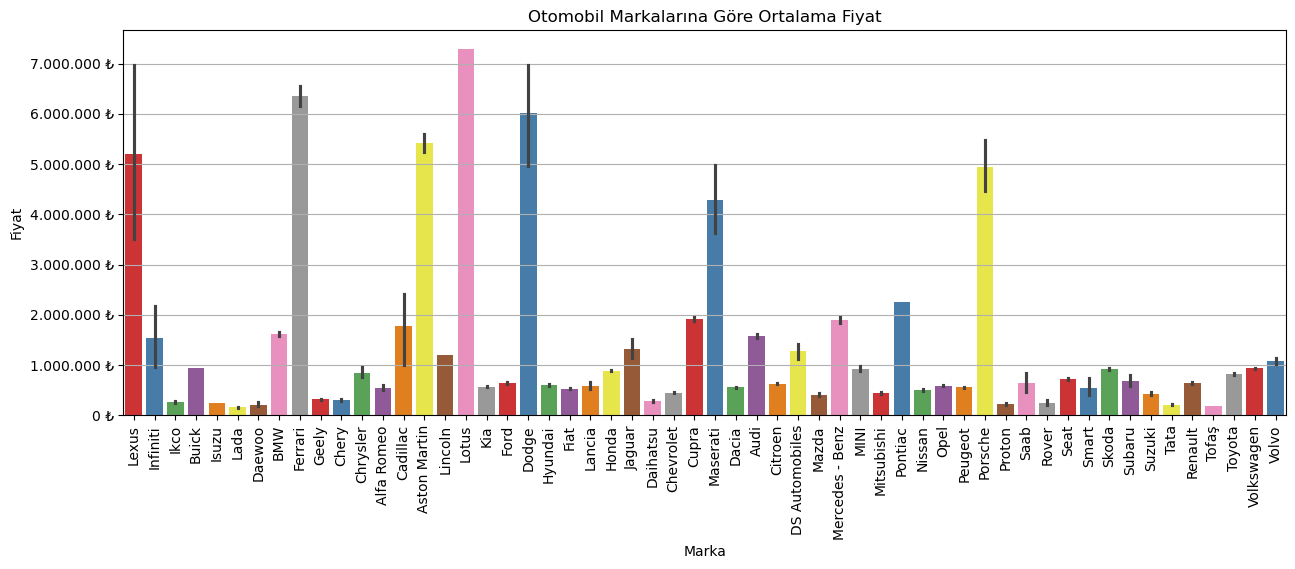

In [46]:
plt.figure(figsize=(15, 5))
sns.barplot(x="marka", y="fiyat", data=df, estimator=np.mean, palette="Set1")
plt.title("Otomobil Markalarına Göre Ortalama Fiyat")
plt.xlabel("Marka")
plt.ylabel("Fiyat")
plt.xticks(rotation=90)
plt.grid(True, axis="y")
plt.gca().yaxis.set_major_formatter(FuncFormatter(fiyat_format))
#plt.savefig("otomobil_markalarina_gore_ortalama_fiyat.png", dpi=300)
plt.show()

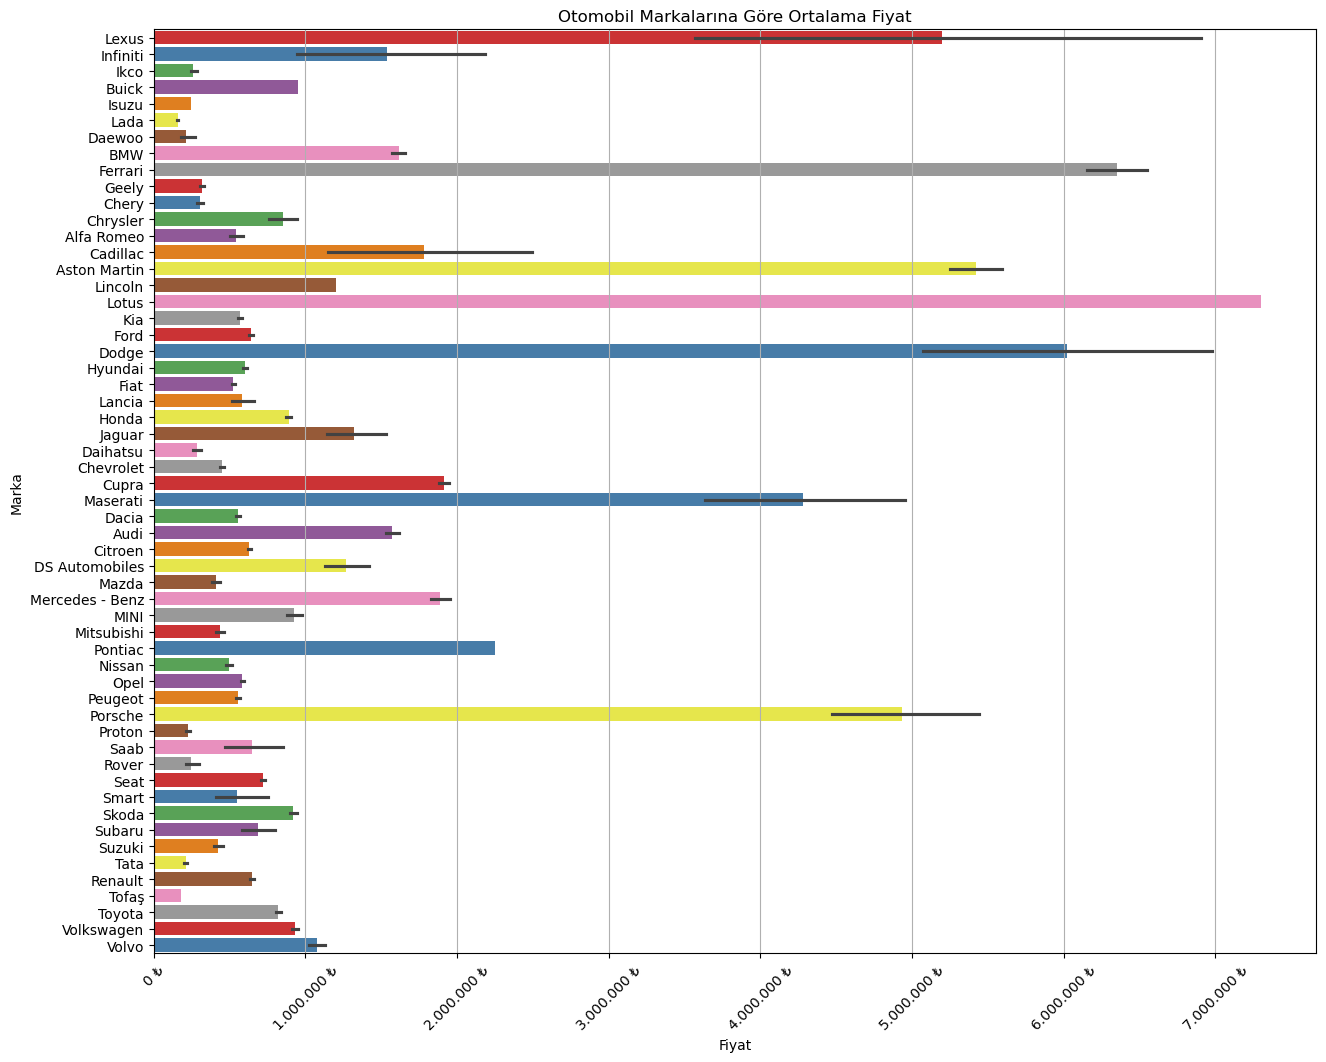

In [47]:
plt.figure(figsize=(15, 12))
sns.barplot(x="fiyat", y="marka", data=df, estimator=np.mean, palette="Set1")
plt.title("Otomobil Markalarına Göre Ortalama Fiyat")
plt.xlabel("Fiyat")
plt.ylabel("Marka")
plt.xticks(rotation=45)
plt.grid(True, axis="x")
plt.gca().xaxis.set_major_formatter(FuncFormatter(fiyat_format))
#plt.savefig("otomobil_markalarina_gore_ortalama_fiyat.png")
plt.show()

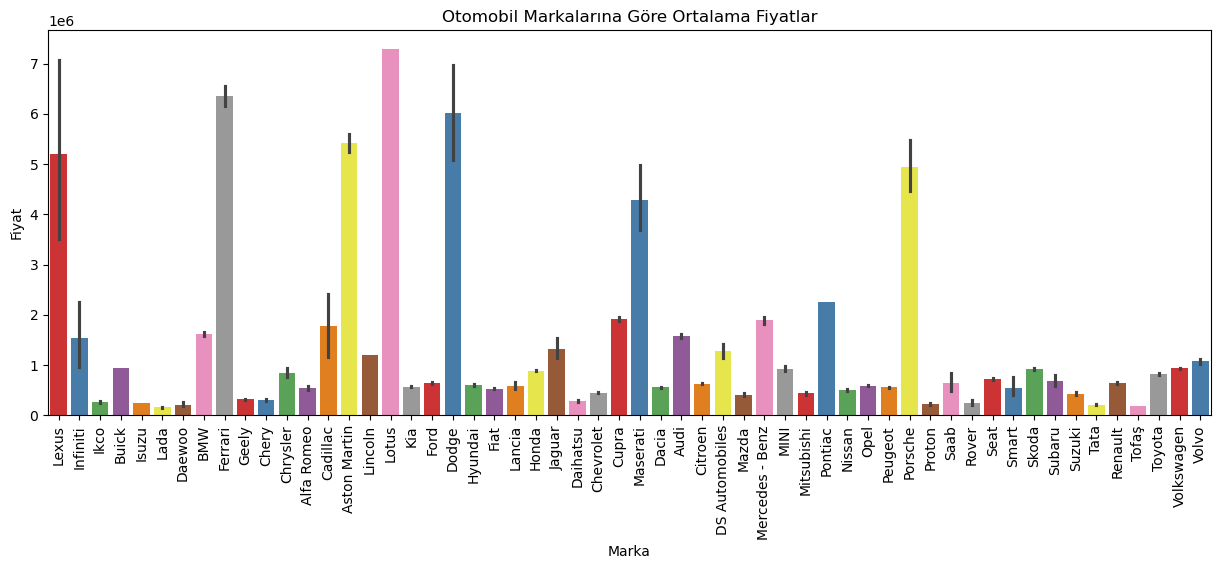

In [48]:
plt.figure(figsize=(15, 5))
sns.barplot(x="marka", y="fiyat", data=df, estimator=np.mean, palette="Set1")
plt.title("Otomobil Markalarına Göre Ortalama Fiyatlar")
plt.xlabel("Marka")
plt.ylabel("Fiyat")
plt.xticks(rotation=90)
plt.show()

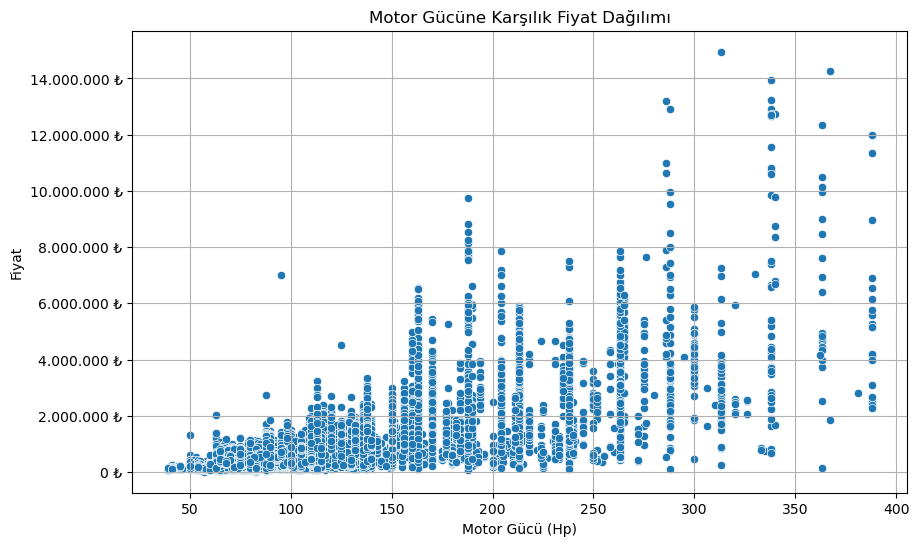

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="motor_gucu", y="fiyat",data=df)
plt.title("Motor Gücüne Karşılık Fiyat Dağılımı")
plt.xlabel("Motor Gücü (Hp)")
plt.ylabel("Fiyat")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(fiyat_format))
#plt.savefig("motor_gucune_karsilik_fiyat_dagilimi.png")
plt.show()

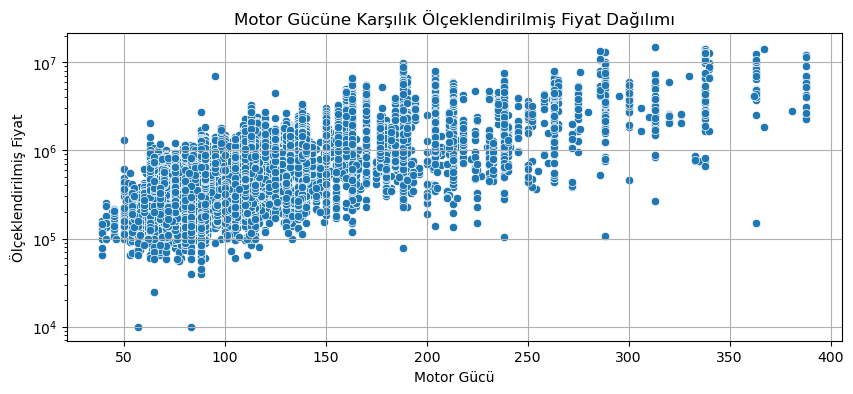

In [50]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x="motor_gucu", y="fiyat",data=df)
plt.yscale("log")
plt.title("Motor Gücüne Karşılık Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Motor Gücü")
plt.ylabel("Ölçeklendirilmiş Fiyat")
plt.grid(True)
plt.show()

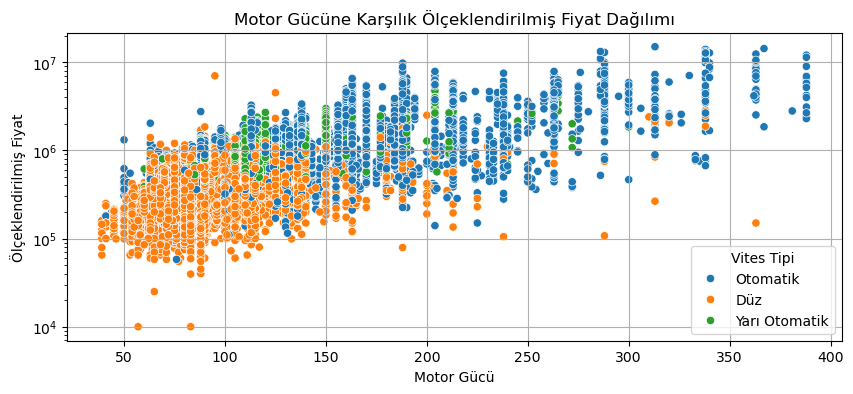

In [51]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x="motor_gucu", y="fiyat", hue="vites_tipi",data=df)
plt.yscale("log")
plt.title("Motor Gücüne Karşılık Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Motor Gücü")
plt.ylabel("Ölçeklendirilmiş Fiyat")
plt.grid(True)
plt.legend(title="Vites Tipi")
plt.show()

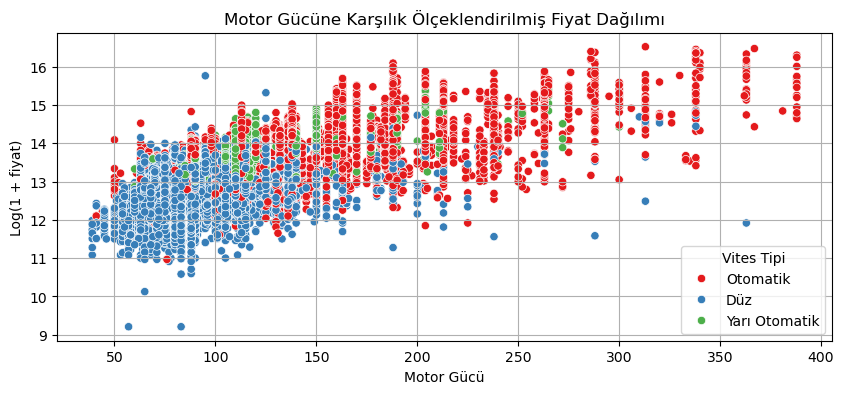

In [52]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x="motor_gucu", y=np.log1p(df["fiyat"]), hue="vites_tipi",data=df, palette="Set1")
plt.title("Motor Gücüne Karşılık Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Motor Gücü")
plt.ylabel("Log(1 + fiyat)")
plt.grid(True)
plt.legend(title="Vites Tipi")
plt.show()

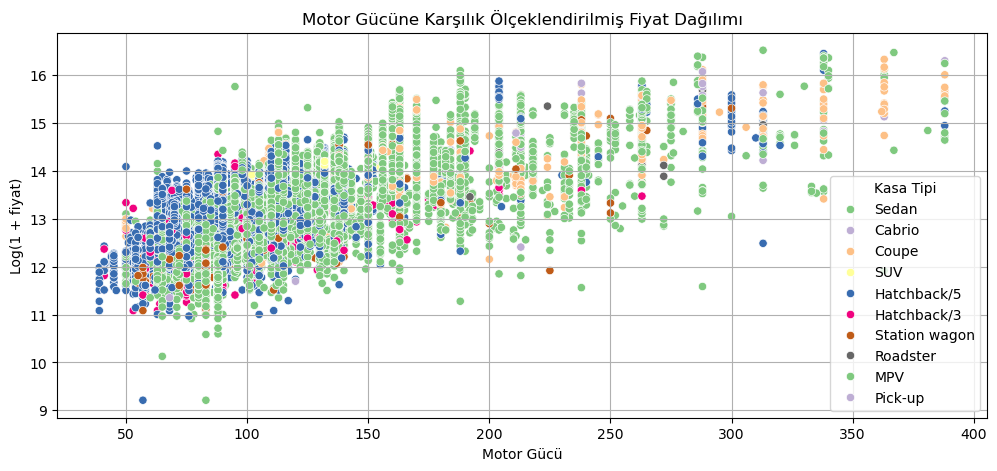

In [53]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x="motor_gucu", y=np.log1p(df["fiyat"]), hue="kasa_tipi",data=df, palette="Accent")
plt.title("Motor Gücüne Karşılık Ölçeklendirilmiş Fiyat Dağılımı")
plt.xlabel("Motor Gücü")
plt.ylabel("Log(1 + fiyat)")
plt.grid(True)
plt.legend(title="Kasa Tipi")
plt.show()

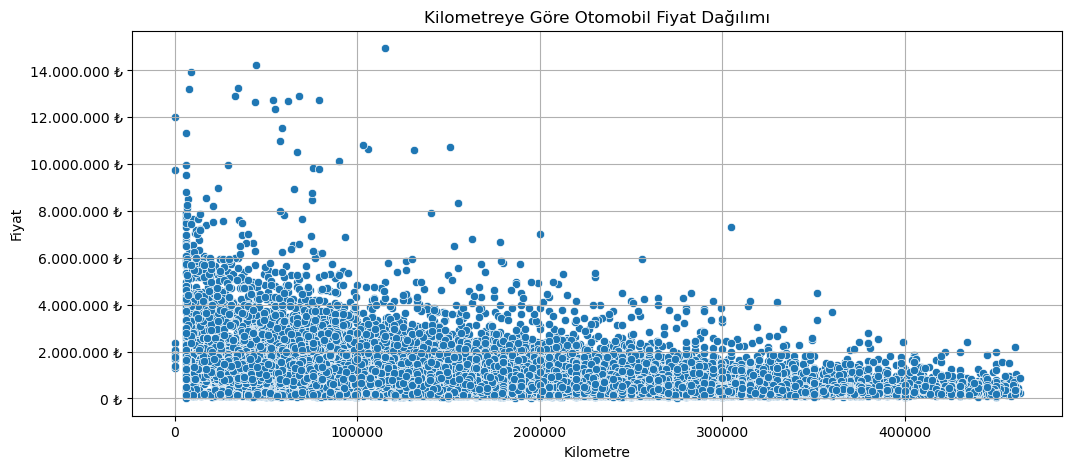

In [54]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x="kilometre", y="fiyat", data=df)
plt.title("Kilometreye Göre Otomobil Fiyat Dağılımı")
plt.xlabel("Kilometre")
plt.ylabel("Fiyat")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(fiyat_format))
#plt.savefig("kilometre_fiyat_dagilimi.png")
plt.show()

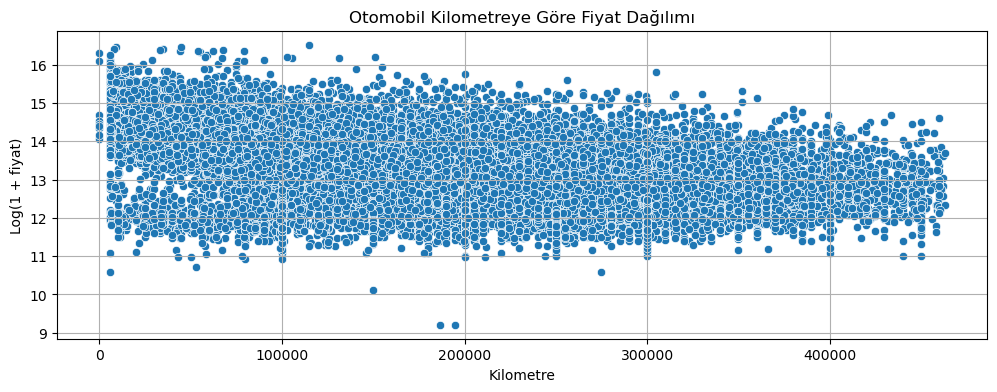

In [55]:
plt.figure(figsize=(12, 4))
sns.scatterplot(x="kilometre", y=np.log1p(df["fiyat"]), data=df)
plt.title("Otomobil Kilometreye Göre Fiyat Dağılımı")
plt.xlabel("Kilometre")
plt.ylabel("Log(1 + fiyat)")
plt.grid(True)
plt.show()

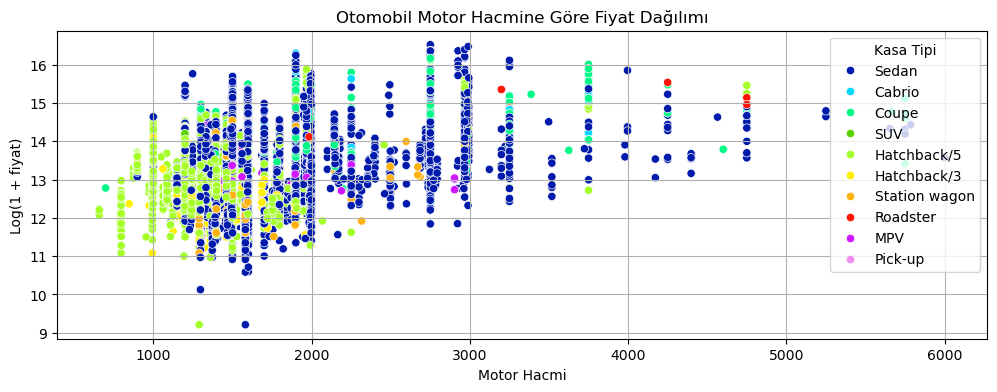

In [56]:
plt.figure(figsize=(12, 4))
sns.scatterplot(x="motor_hacmi", y=np.log1p(df["fiyat"]), hue="kasa_tipi", data=df, palette="gist_ncar")
plt.title("Otomobil Motor Hacmine Göre Fiyat Dağılımı")
plt.xlabel("Motor Hacmi")
plt.ylabel("Log(1 + fiyat)")
plt.grid(True)
plt.legend(title="Kasa Tipi")
plt.show()

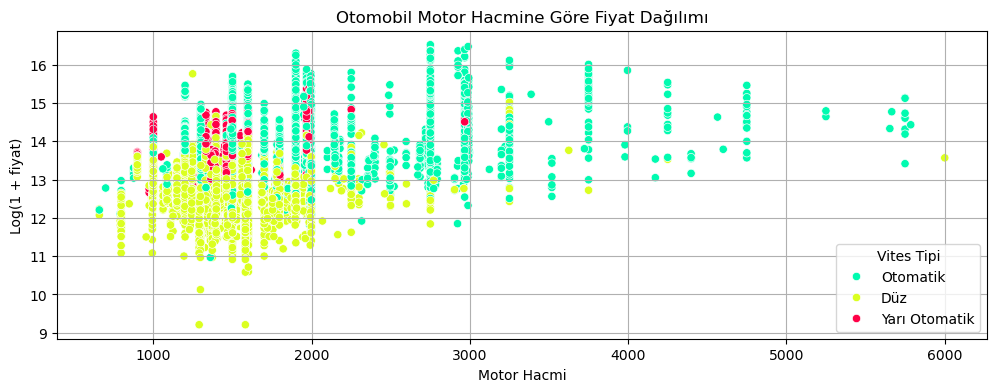

In [57]:
plt.figure(figsize=(12, 4))
sns.scatterplot(x="motor_hacmi", y=np.log1p(df["fiyat"]), hue="vites_tipi", data=df, palette="gist_ncar")
plt.title("Otomobil Motor Hacmine Göre Fiyat Dağılımı")
plt.xlabel("Motor Hacmi")
plt.ylabel("Log(1 + fiyat)")
plt.grid(True)
plt.legend(title="Vites Tipi")
plt.show()

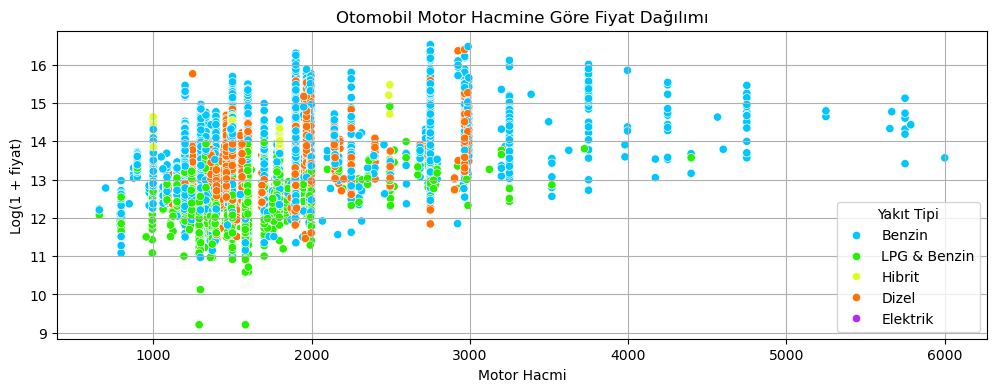

In [58]:
plt.figure(figsize=(12, 4))
sns.scatterplot(x="motor_hacmi", y=np.log1p(df["fiyat"]), hue="yakit_tipi", data=df, palette="gist_ncar")
plt.title("Otomobil Motor Hacmine Göre Fiyat Dağılımı")
plt.xlabel("Motor Hacmi")
plt.ylabel("Log(1 + fiyat)")
plt.grid(True)
plt.legend(title="Yakıt Tipi")
plt.show()

In [59]:
sayisal_df = df.select_dtypes(include="int64")
corr_matris = sayisal_df.corr()

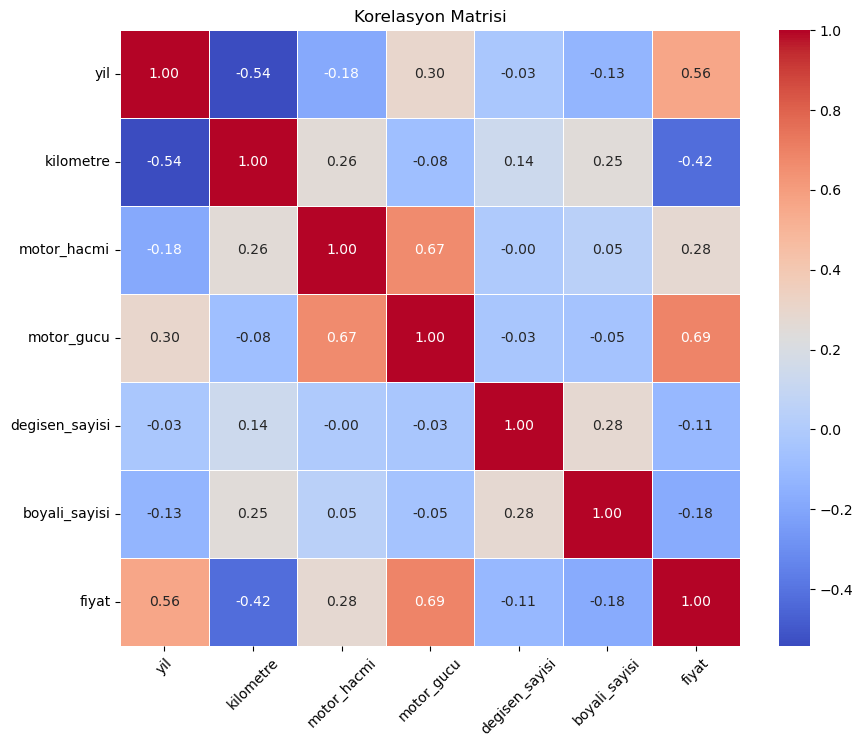

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matris, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.xticks(rotation=45)
#plt.savefig("korelasyon_matrisi.png")
plt.show()

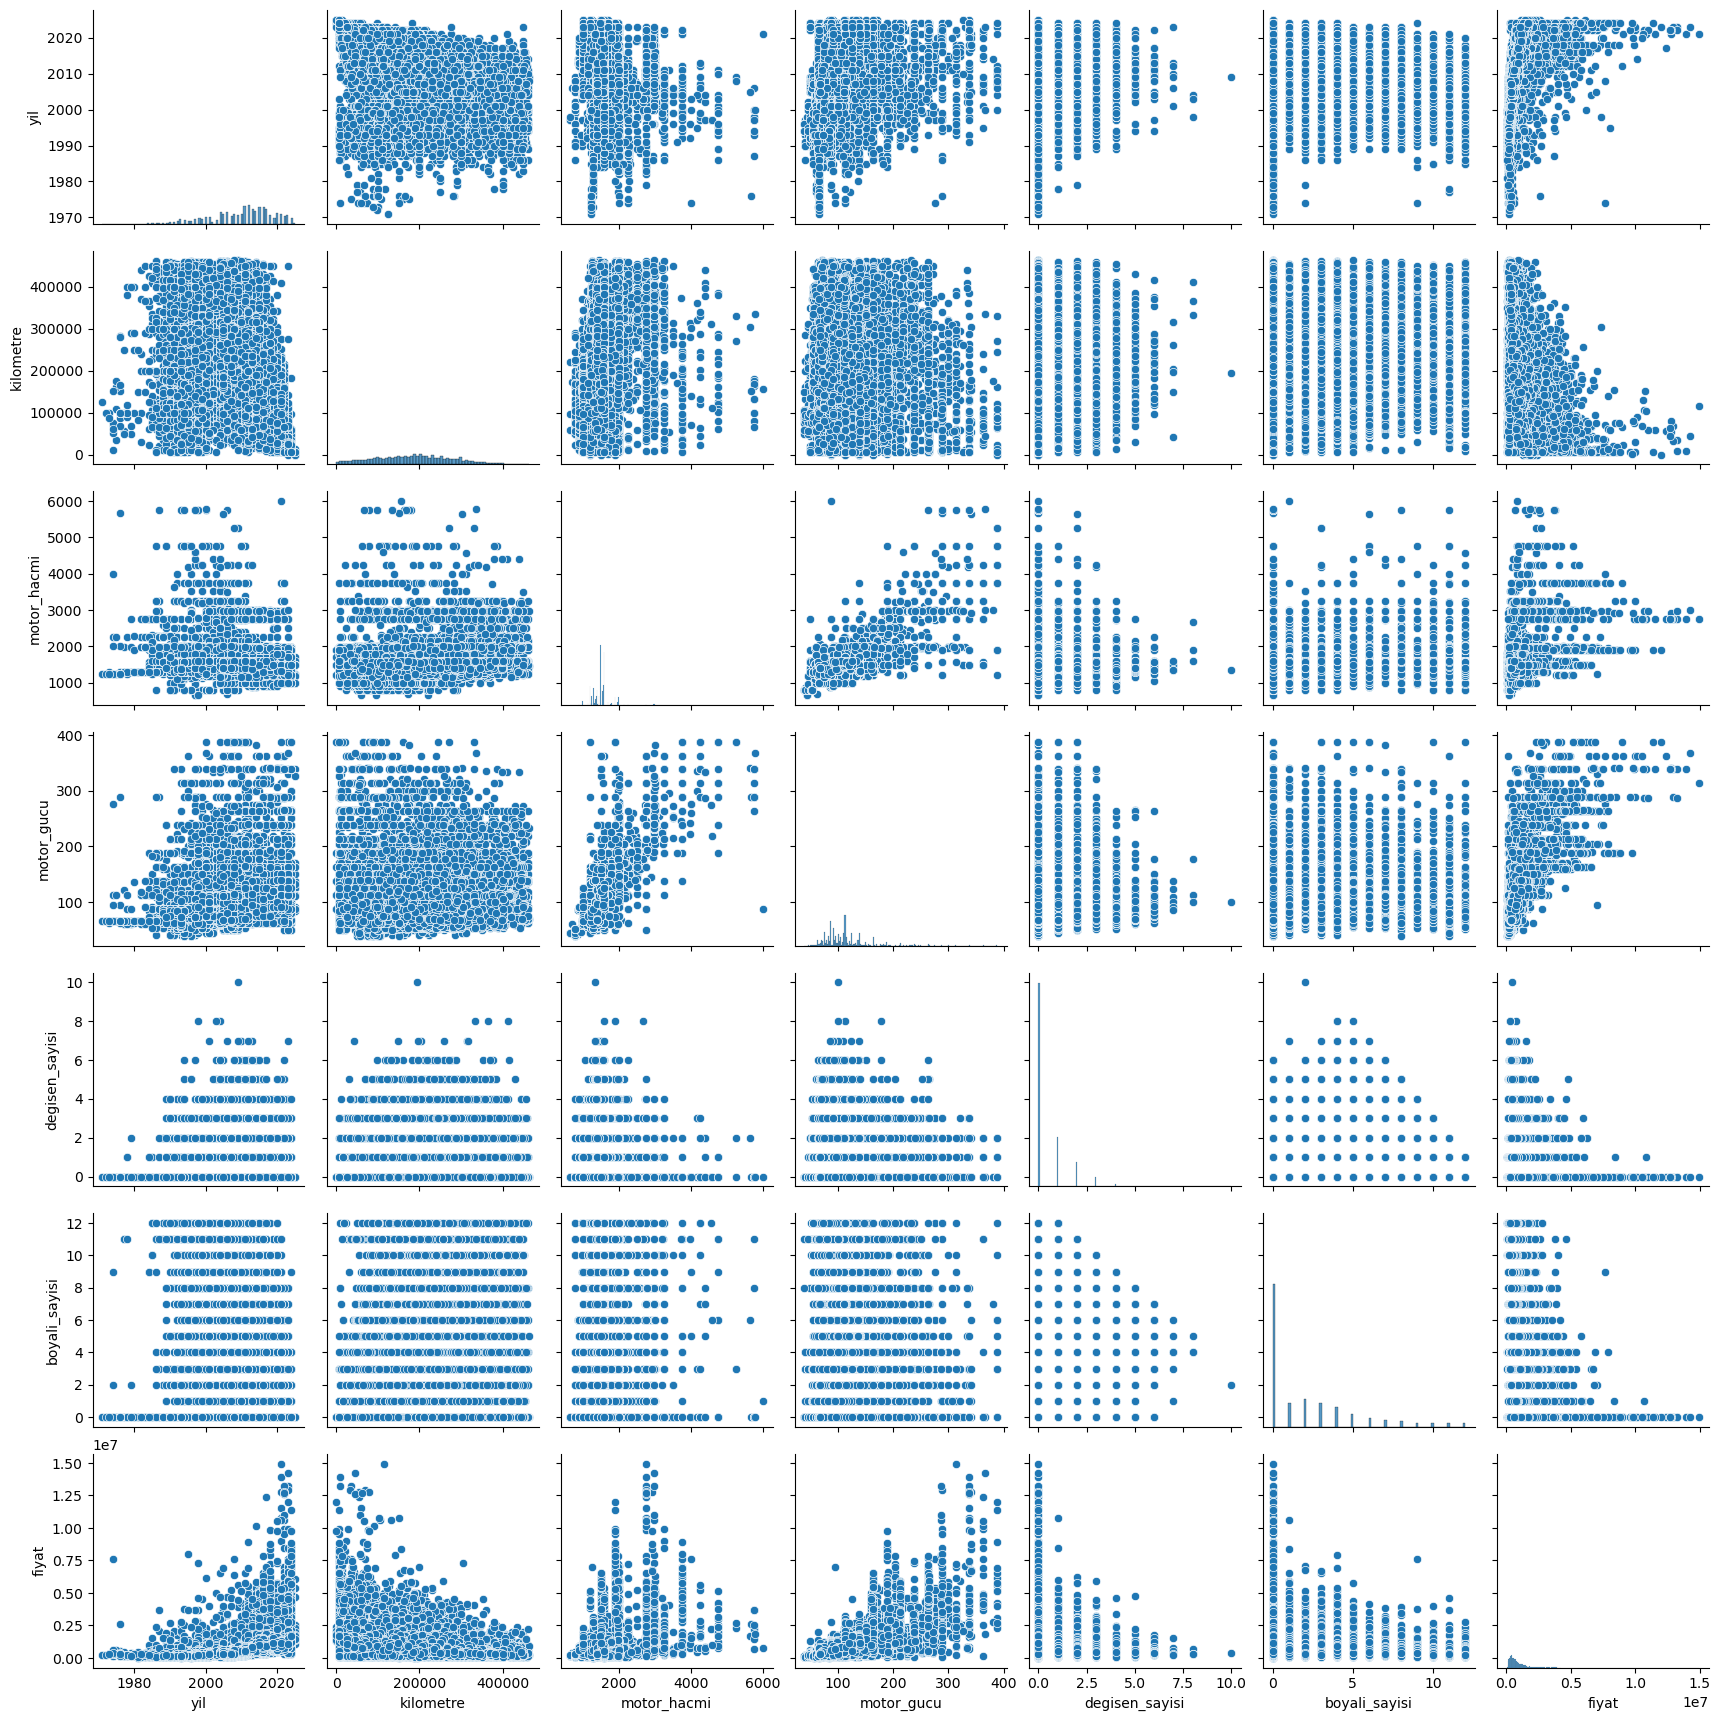

In [61]:
sns.pairplot(df)
plt.show()

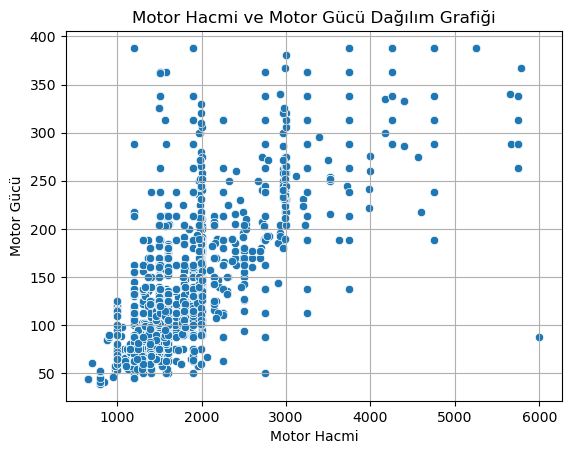

In [62]:
plt.figure()
sns.scatterplot(x="motor_hacmi", y="motor_gucu", data=df)
plt.title("Motor Hacmi ve Motor Gücü Dağılım Grafiği")
plt.xlabel("Motor Hacmi")
plt.ylabel("Motor Gücü")
plt.grid(True)
#plt.savefig("motor_hacmi_motor_gucu_dagilimi.png")
plt.show()

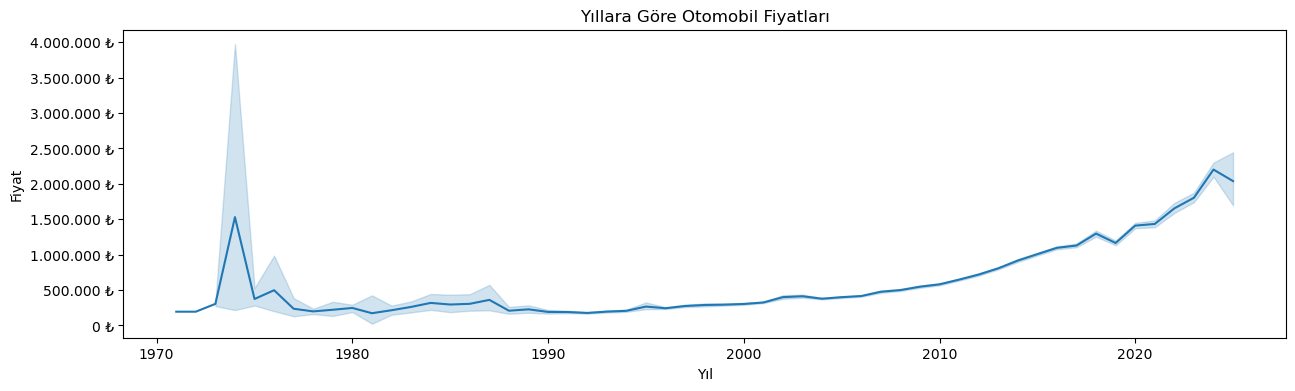

In [63]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="yil", y="fiyat", data=df)
plt.title("Yıllara Göre Otomobil Fiyatları")
plt.xlabel("Yıl")
plt.ylabel("Fiyat")
plt.gca().yaxis.set_major_formatter(FuncFormatter(fiyat_format))
plt.show()

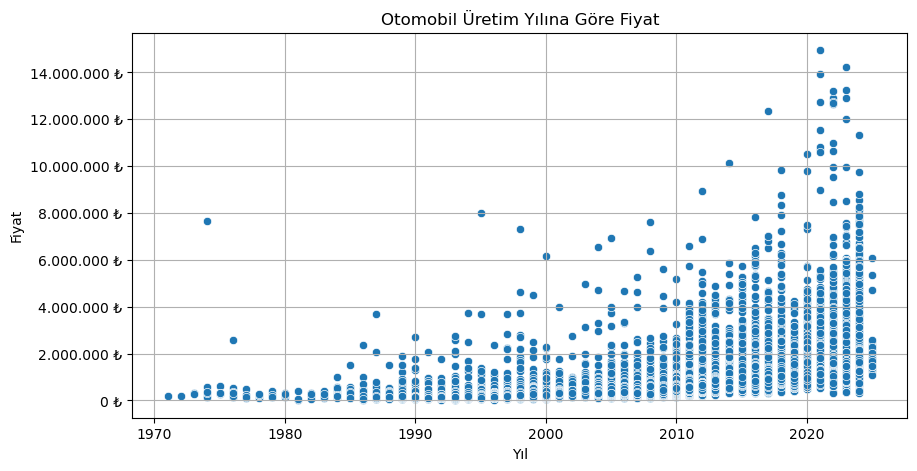

In [64]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="yil", y="fiyat", data=df)
plt.xlabel("Yıl")
plt.ylabel("Fiyat")
plt.title("Otomobil Üretim Yılına Göre Fiyat")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(fiyat_format))
#plt.savefig("otomobil_uretim_yılına_gore_fiyat.png")
plt.show()

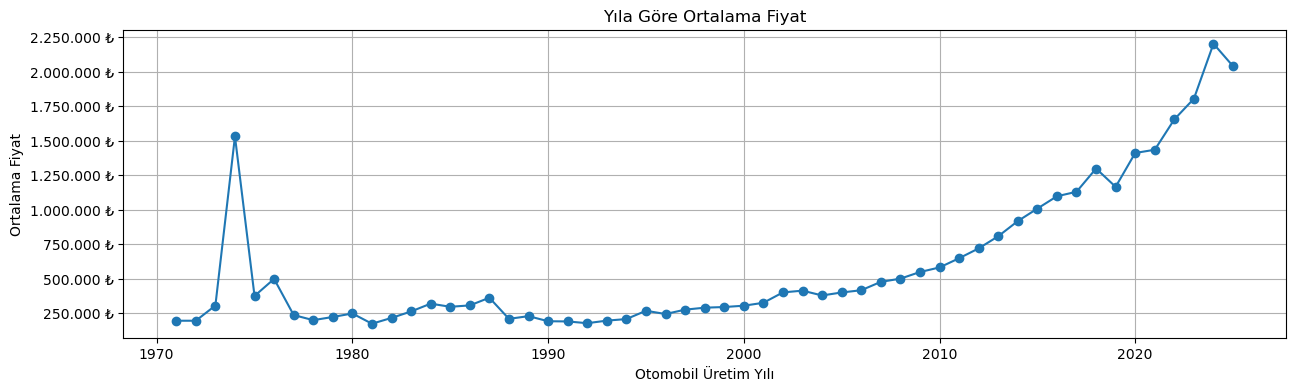

In [65]:
plt.figure(figsize=(15, 4))
df.groupby("yil")["fiyat"].mean().plot(kind="line", marker="o")
plt.title("Yıla Göre Ortalama Fiyat")
plt.xlabel("Otomobil Üretim Yılı")
plt.ylabel("Ortalama Fiyat")
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(fiyat_format))
plt.show()

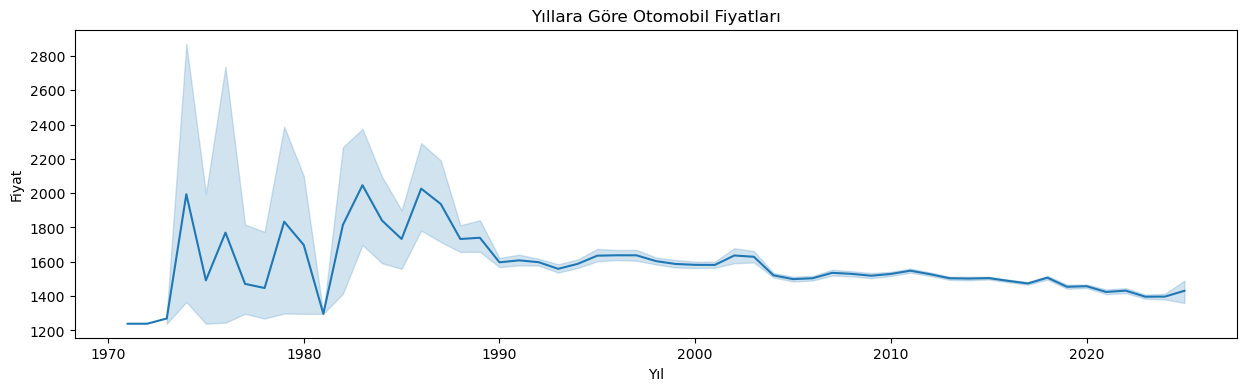

In [66]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="yil", y="motor_hacmi", data=df)
plt.title("Yıllara Göre Otomobil Fiyatları")
plt.xlabel("Yıl")
plt.ylabel("Fiyat")
plt.show()

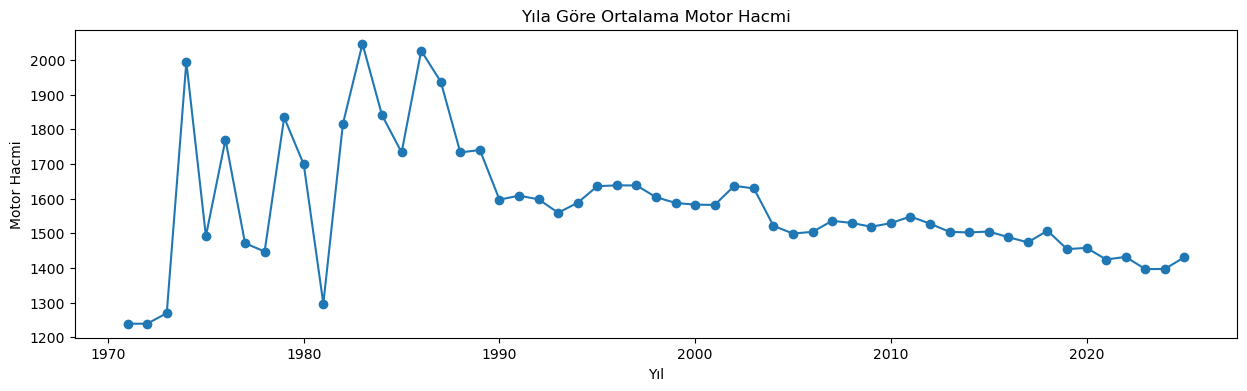

In [67]:
plt.figure(figsize=(15, 4))
df.groupby("yil")["motor_hacmi"].mean().plot(kind="line", marker="o")
plt.title("Yıla Göre Ortalama Motor Hacmi")
plt.xlabel("Yıl")
plt.ylabel("Motor Hacmi")
plt.show()

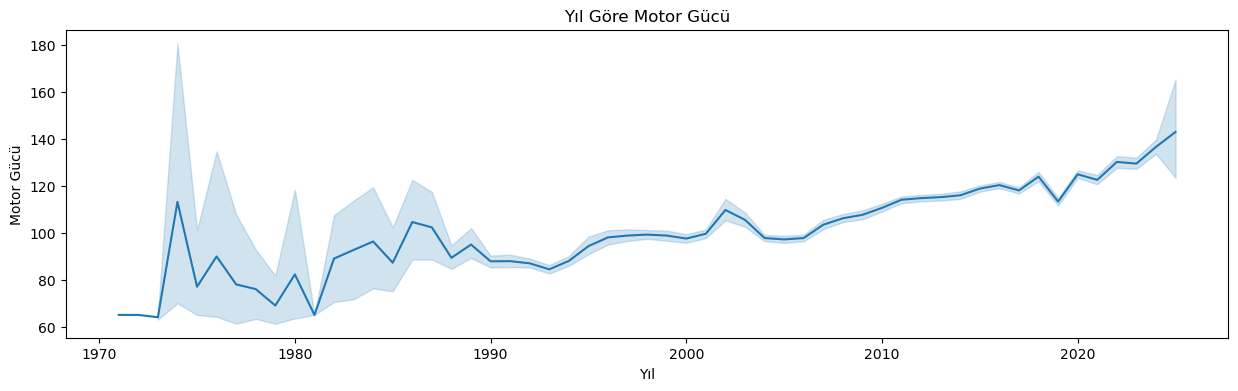

In [68]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="yil", y="motor_gucu", data=df)
plt.title("Yıl Göre Motor Gücü")
plt.xlabel("Yıl")
plt.ylabel("Motor Gücü")
plt.show()

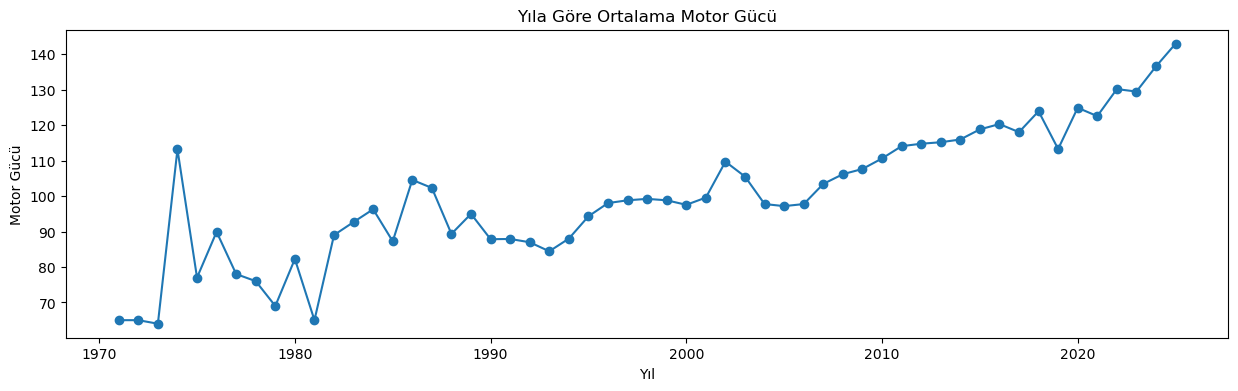

In [69]:
plt.figure(figsize=(15, 4))
df.groupby("yil")["motor_gucu"].mean().plot(kind="line", marker="o")
plt.title("Yıla Göre Ortalama Motor Gücü")
plt.xlabel("Yıl")
plt.ylabel("Motor Gücü")
plt.show()

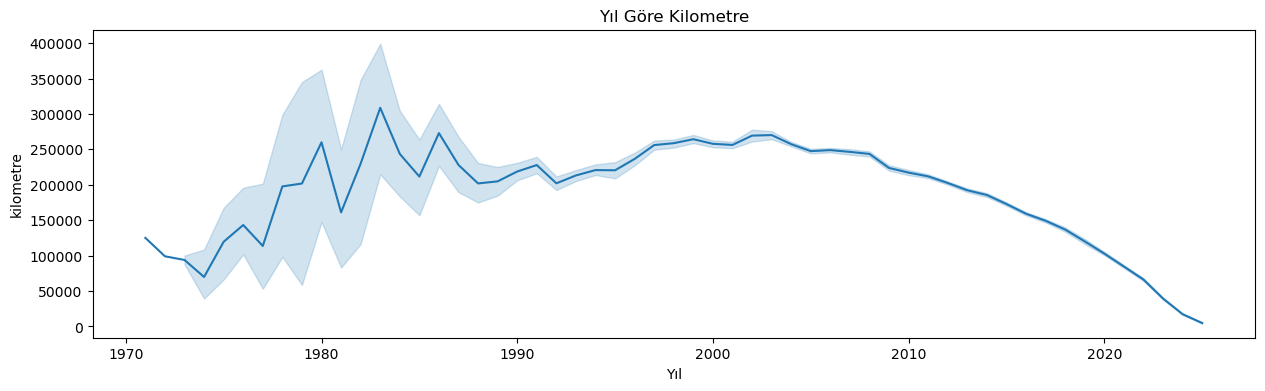

In [70]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="yil", y="kilometre", data=df)
plt.title("Yıl Göre Kilometre")
plt.xlabel("Yıl")
plt.ylabel("kilometre")
plt.show()

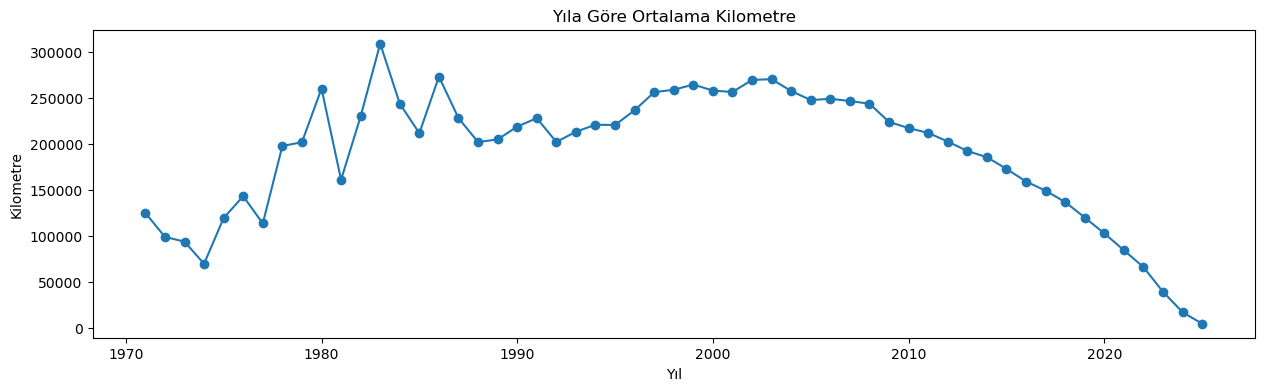

In [71]:
plt.figure(figsize=(15, 4))
df.groupby("yil")["kilometre"].mean().plot(kind="line", marker="o")
plt.title("Yıla Göre Ortalama Kilometre")
plt.xlabel("Yıl")
plt.ylabel("Kilometre")
plt.show()

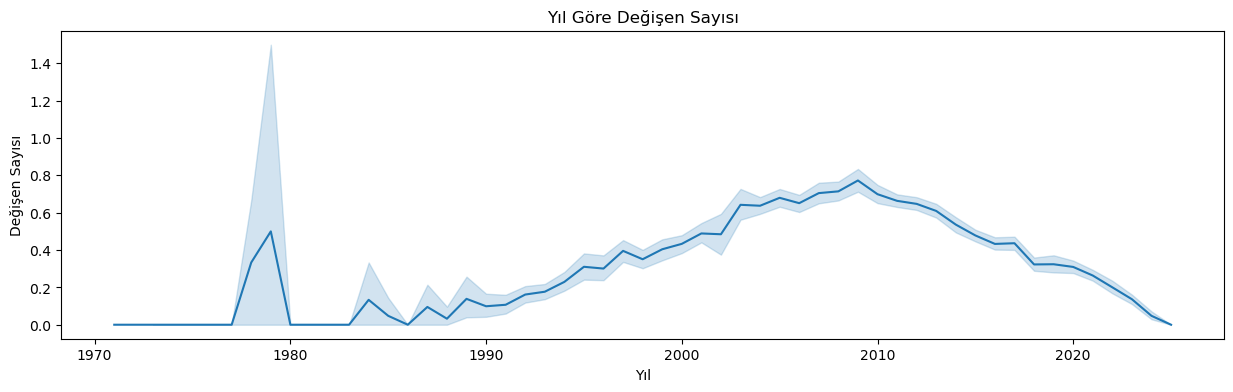

In [72]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="yil", y="degisen_sayisi", data=df)
plt.title("Yıl Göre Değişen Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Değişen Sayısı")
plt.show()

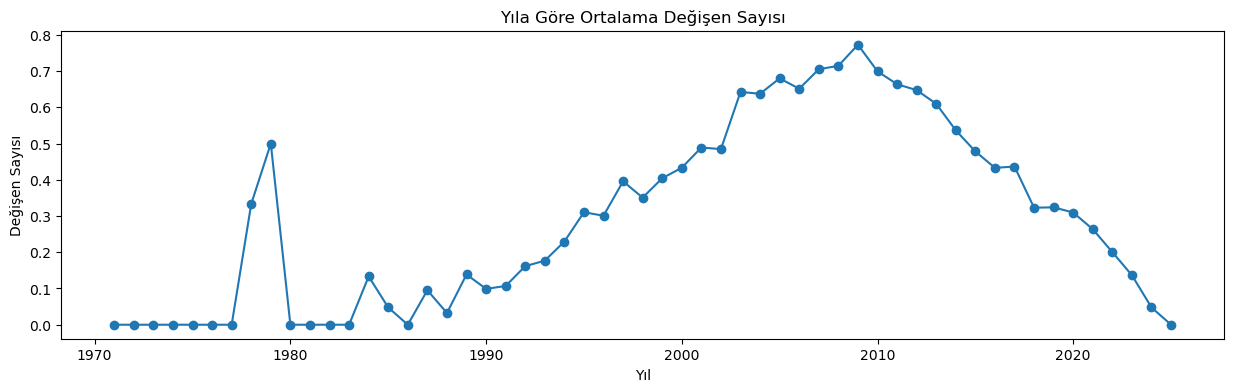

In [73]:
plt.figure(figsize=(15, 4))
df.groupby("yil")["degisen_sayisi"].mean().plot(kind="line", marker="o")
plt.title("Yıla Göre Ortalama Değişen Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Değişen Sayısı")
plt.show()

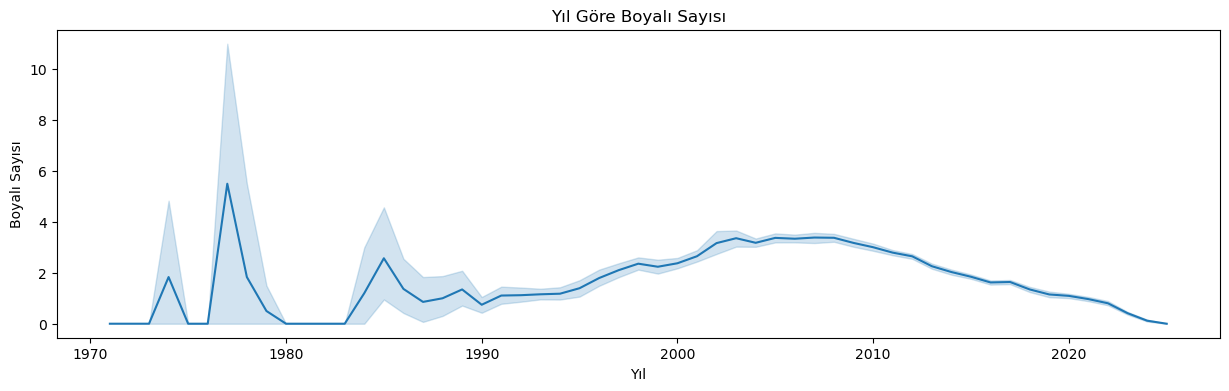

In [74]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="yil", y="boyali_sayisi", data=df)
plt.title("Yıl Göre Boyalı Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Boyalı Sayısı")
plt.show()

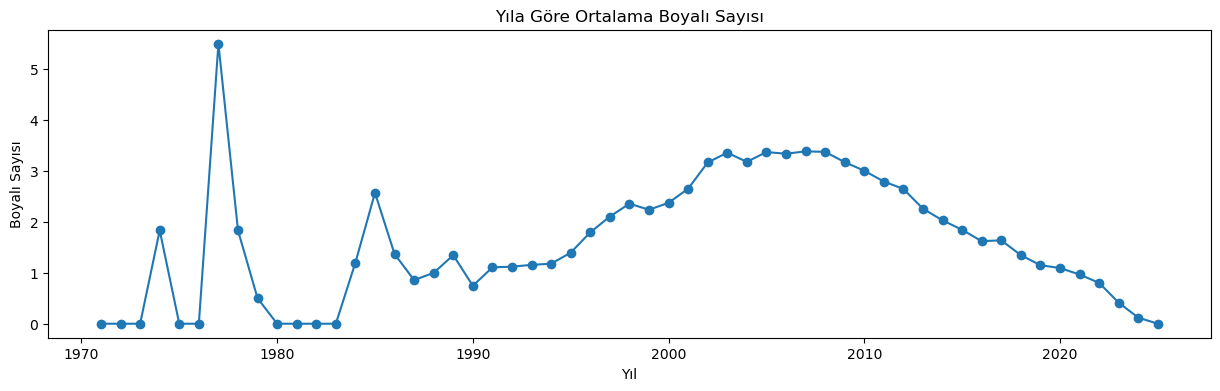

In [75]:
plt.figure(figsize=(15, 4))
df.groupby("yil")["boyali_sayisi"].mean().plot(kind="line", marker="o")
plt.title("Yıla Göre Ortalama Boyalı Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Boyalı Sayısı")
plt.show()

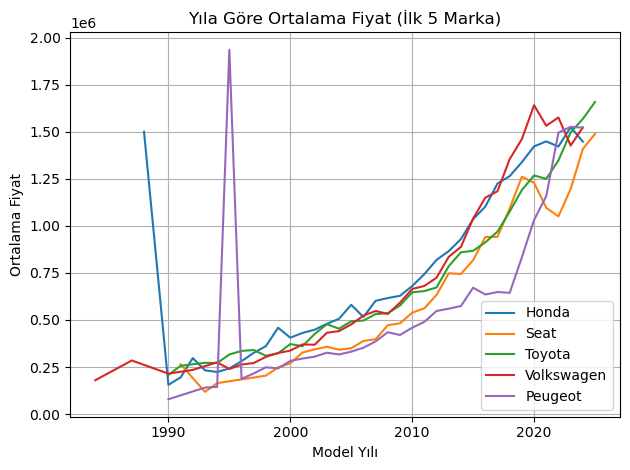

In [76]:
top_markalar = df["marka"].value_counts().head(5).index
for marka in top_markalar:
    df[df["marka"] == marka].groupby("yil")["fiyat"].mean().plot(label=marka)

plt.title("Yıla Göre Ortalama Fiyat (İlk 5 Marka)")
plt.xlabel("Model Yılı")
plt.ylabel("Ortalama Fiyat")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

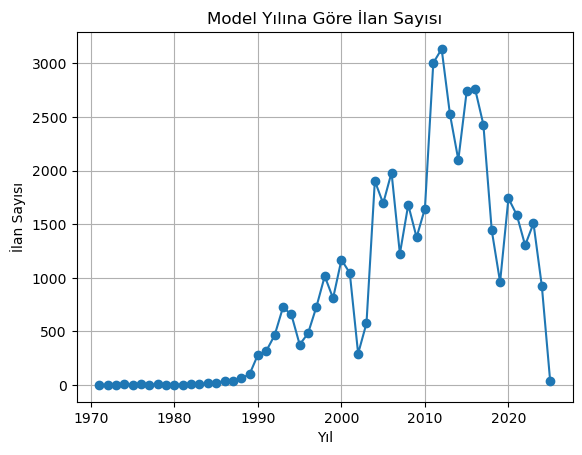

In [77]:
df["yil"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Model Yılına Göre İlan Sayısı")
plt.xlabel("Yıl")
plt.ylabel("İlan Sayısı")
plt.grid(True)
plt.show()

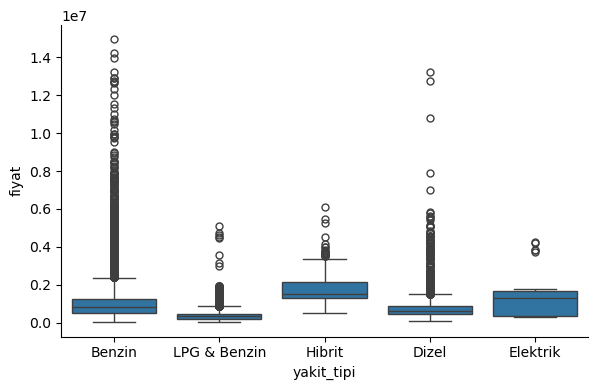

In [78]:
sns.catplot(x="yakit_tipi", y="fiyat", data=df, kind="box", height=4, aspect=1.5)
plt.show()

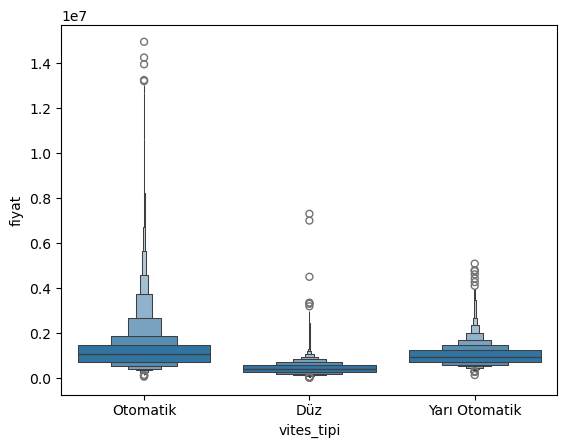

In [79]:
sns.boxenplot(x="vites_tipi", y="fiyat", data=df)
plt.show()

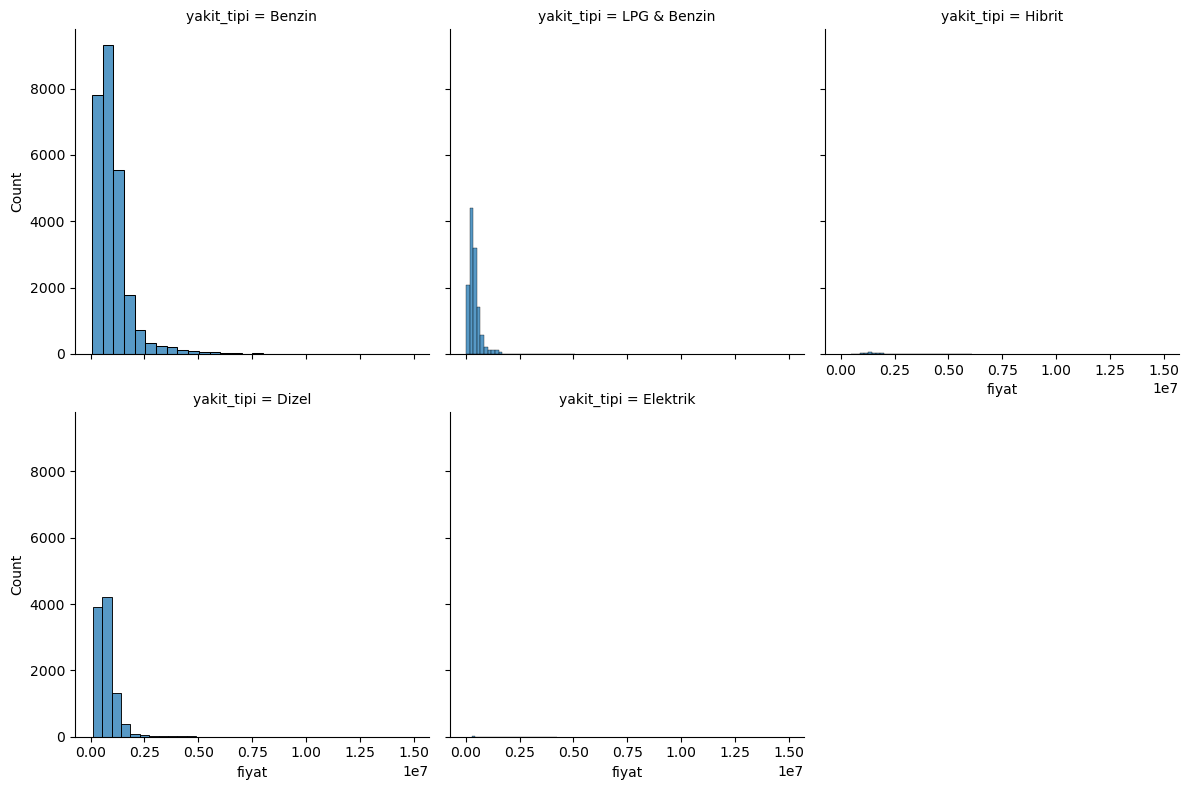

In [80]:
g = sns.FacetGrid(df, col="yakit_tipi", col_wrap=3, height=4)
g.map(sns.histplot, "fiyat", bins=30)
plt.show()

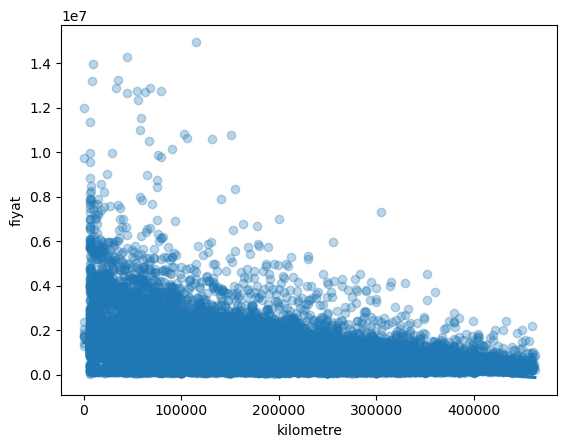

In [81]:
sns.regplot(x="kilometre", y="fiyat", data=df, scatter_kws={"alpha":0.3})
plt.show()

In [82]:
df.nunique()

marka               56
seri               448
model             2946
yil                 55
kilometre         5193
vites_tipi           3
yakit_tipi           5
kasa_tipi           10
renk                24
motor_hacmi        272
motor_gucu         188
degisen_sayisi      10
boyali_sayisi       13
kimden               4
fiyat             4405
dtype: int64

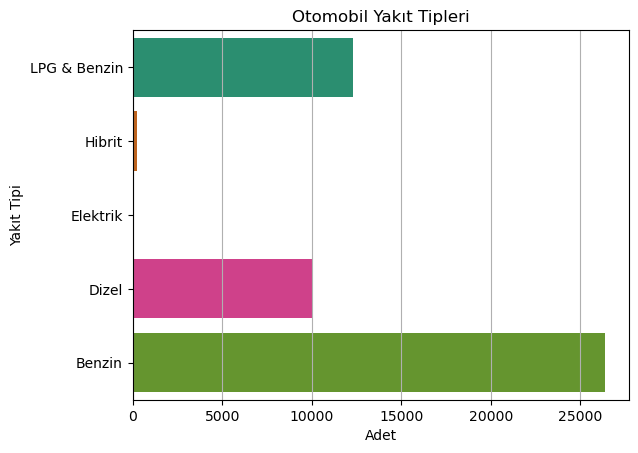

In [83]:
plt.figure()
sns.countplot(y=df["yakit_tipi"].sort_values(ascending=False), palette="Dark2")
plt.title("Otomobil Yakıt Tipleri")
plt.xlabel("Adet")
plt.ylabel("Yakıt Tipi")
plt.grid(True, axis="x")
plt.show()

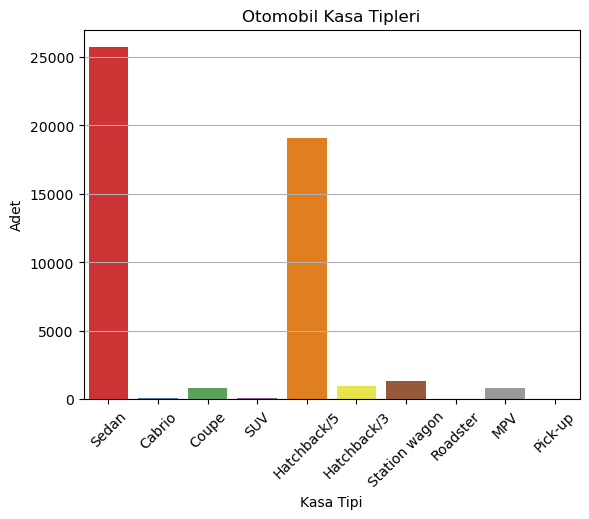

In [84]:
plt.figure()
sns.countplot(x=df["kasa_tipi"], palette="Set1")
plt.title("Otomobil Kasa Tipleri")
plt.xlabel("Kasa Tipi")
plt.ylabel("Adet")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()

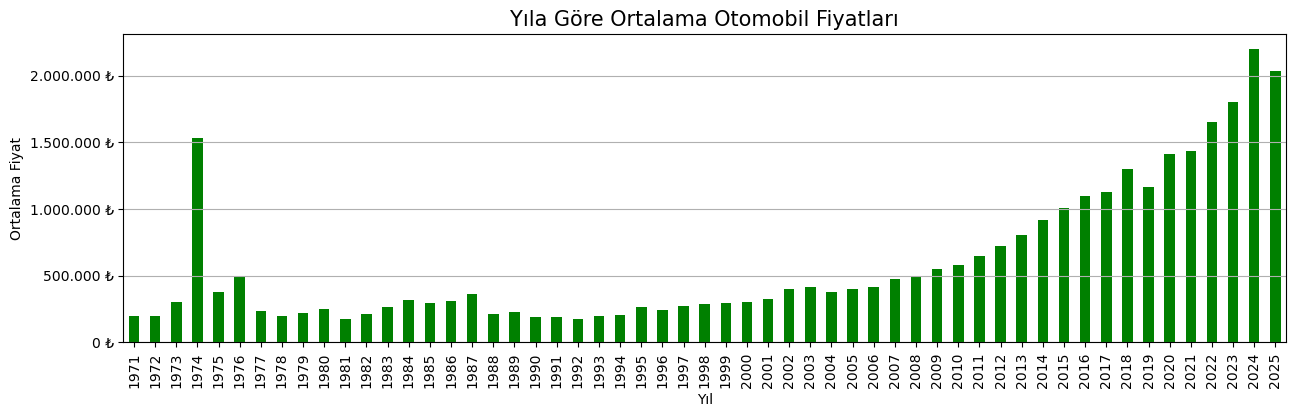

In [85]:
plt.figure(figsize=(15, 4))
df.groupby("yil")["fiyat"].mean().plot(kind="bar", color="g")
plt.title("Yıla Göre Ortalama Otomobil Fiyatları", fontsize=15)
plt.xlabel("Yıl")
plt.ylabel("Ortalama Fiyat")
plt.grid(True, axis="y")
plt.gca().yaxis.set_major_formatter(FuncFormatter(fiyat_format))
plt.show()

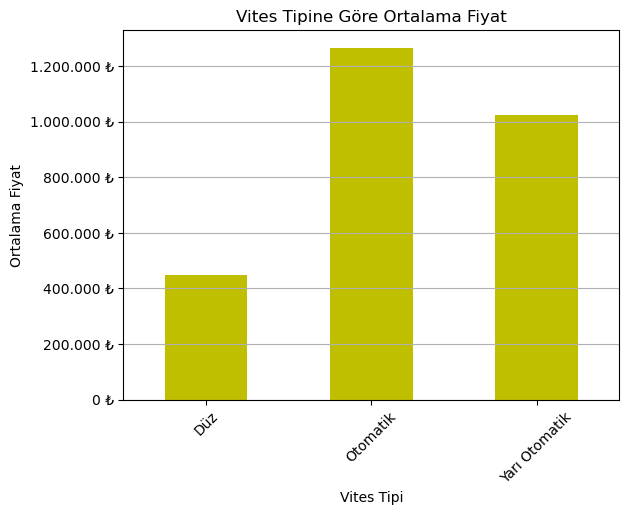

In [86]:
plt.figure()
df.groupby("vites_tipi")["fiyat"].mean().plot(kind="bar", color="y")
plt.title("Vites Tipine Göre Ortalama Fiyat")
plt.xlabel("Vites Tipi")
plt.ylabel("Ortalama Fiyat")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.gca().yaxis.set_major_formatter(FuncFormatter(fiyat_format))
plt.show()

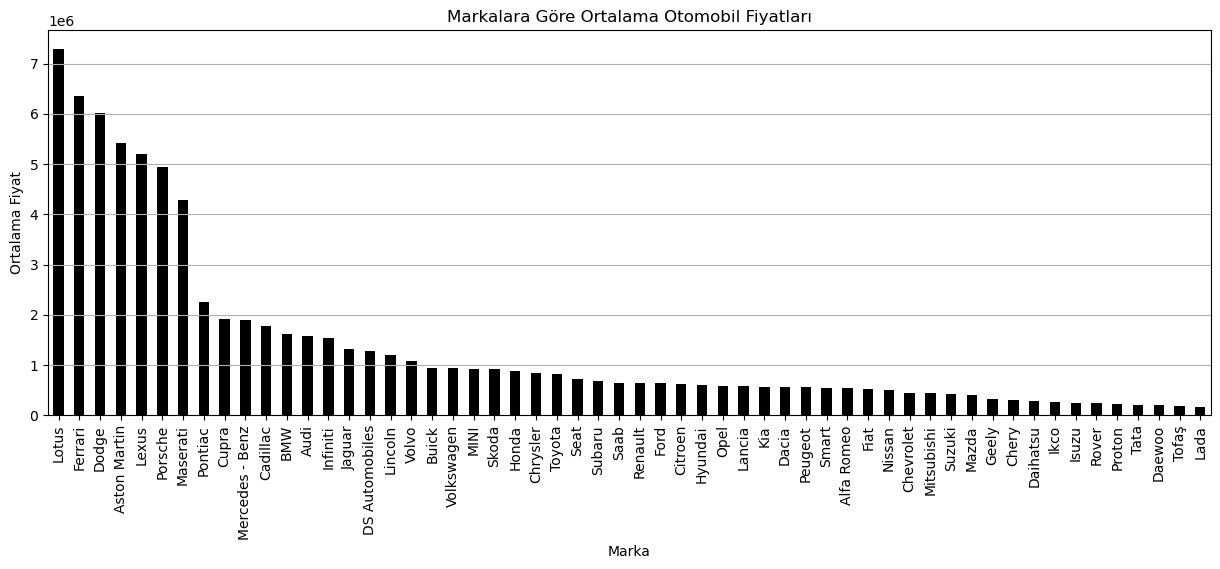

In [87]:
plt.figure(figsize=(15,5))
df.groupby("marka")["fiyat"].mean().sort_values(ascending=False).plot(kind="bar", color="black")
plt.title("Markalara Göre Ortalama Otomobil Fiyatları")
plt.xlabel("Marka")
plt.ylabel("Ortalama Fiyat")
plt.xticks(rotation=90)
plt.grid(True, axis="y")
plt.show()

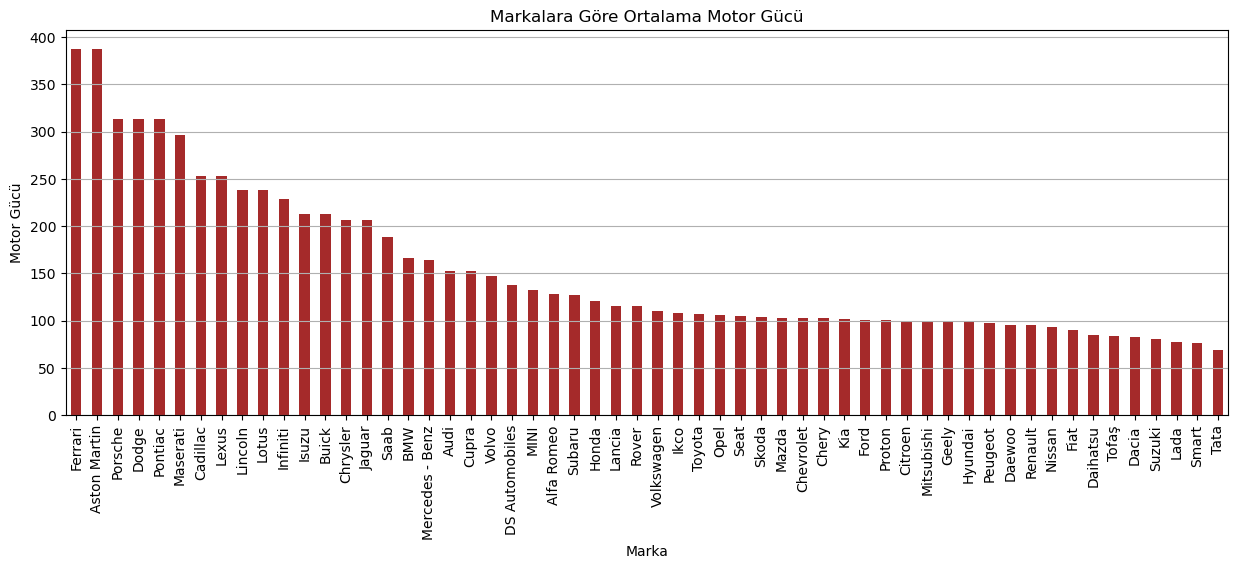

In [88]:
plt.figure(figsize=(15, 5))
df.groupby("marka")["motor_gucu"].mean().sort_values(ascending=False).plot(kind="bar", color="brown")
plt.title("Markalara Göre Ortalama Motor Gücü")
plt.xlabel("Marka")
plt.ylabel("Motor Gücü")
plt.grid(True, axis="y")
plt.show()

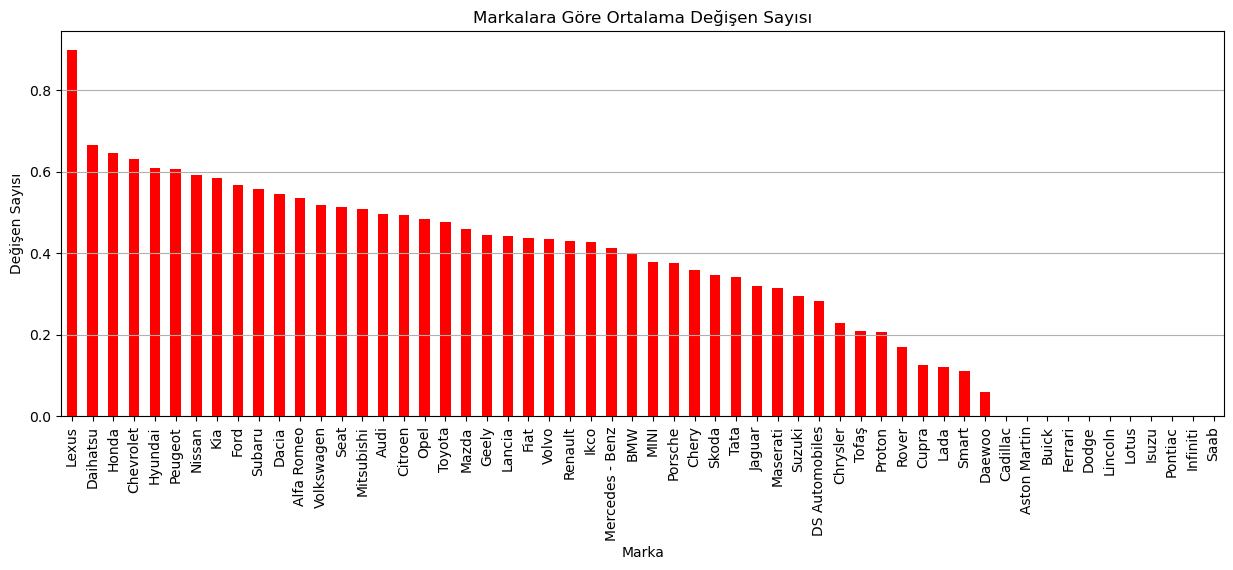

In [89]:
plt.figure(figsize=(15, 5))
df.groupby("marka")["degisen_sayisi"].mean().sort_values(ascending=False).plot(kind="bar", color="red")
plt.title("Markalara Göre Ortalama Değişen Sayısı")
plt.xlabel("Marka")
plt.ylabel("Değişen Sayısı")
plt.grid(True, axis="y")
plt.show()

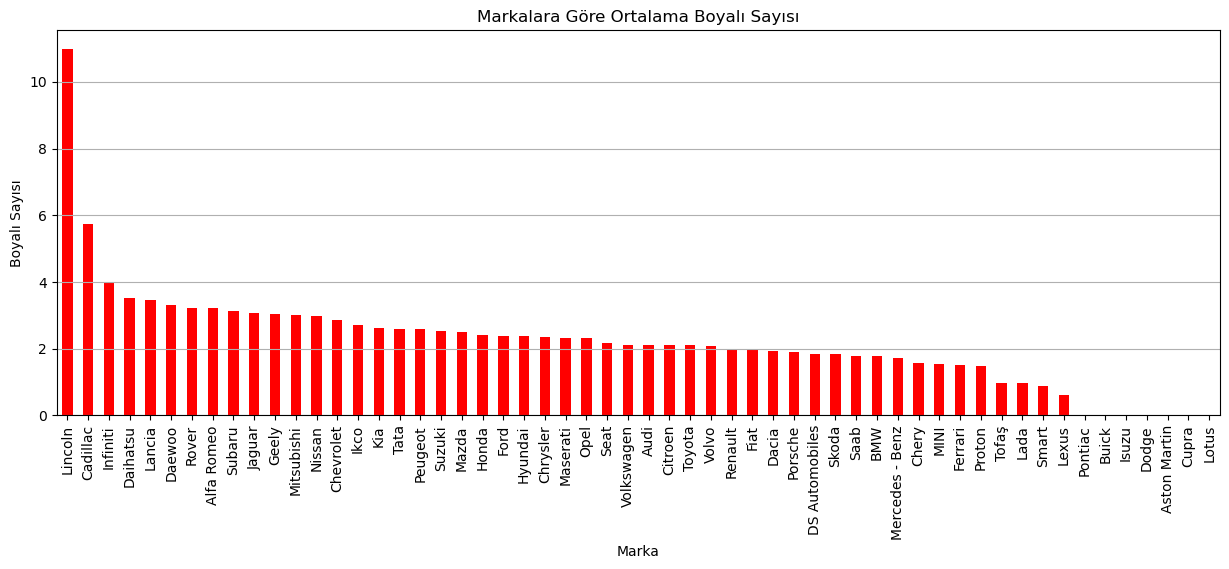

In [90]:
plt.figure(figsize=(15, 5))
df.groupby("marka")["boyali_sayisi"].mean().sort_values(ascending=False).plot(kind="bar", color="red")
plt.title("Markalara Göre Ortalama Boyalı Sayısı")
plt.xlabel("Marka")
plt.ylabel("Boyalı Sayısı")
plt.grid(True, axis="y")
plt.show()

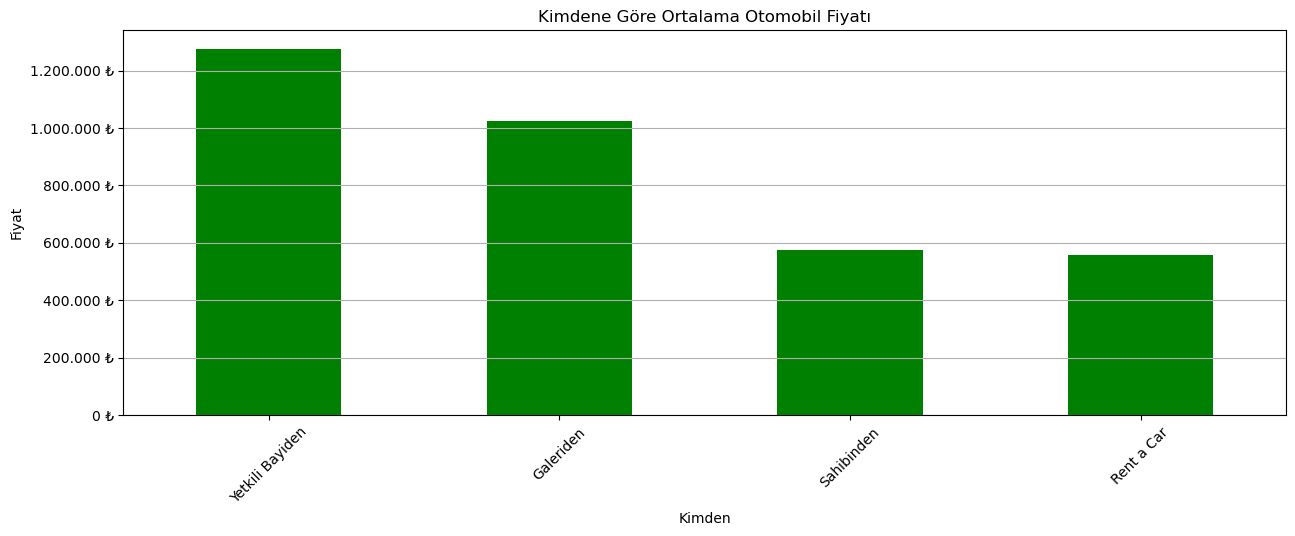

In [91]:
plt.figure(figsize=(15, 5))
df.groupby("kimden")["fiyat"].mean().sort_values(ascending=False).plot(kind="bar", color="green")
plt.title("Kimdene Göre Ortalama Otomobil Fiyatı")
plt.xlabel("Kimden")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.gca().yaxis.set_major_formatter(FuncFormatter(fiyat_format))
plt.show()